### Project
STINTSY - S13

Albarracin, Clarissa
Garcia, Reina Althea
Santos, Miko

# I. Introduction

"No economy can succeed without a high-quality workforce, particularly in an age of globalization and technical change," stated well-known American economist Ben Bernanke. In our rapidly evolving society, a skilled workforce remains fundamental to national development. The Philippines has been recognized as one of Asia's leading emerging economies by NEDA Secretary Arsenio M. Balisacan, with GDP growth accelerating to 6.3% in Q2 of 2024. To sustain this economic momentum, the country's labor force must adapt and enhance its capabilities in alignment with global economic trends. With that in mind, our study aims to analyze the status of the national workforce using data from the nationwide Labor Force Survey conducted in April 2016 by the Philippines Statistics Authority.

Applying our knowledge on intelligent systems, we will develop predictive models using appropriate classification algorithms to address the issue of overworking in the country's labor force:

### Overwork Classification

Extended work hours present considerable risks to worker health and productivity. In 2016, the World Health Organization documented approximately 745,000 deaths from stroke and ischemic heart disease attributed to excessive working hours—a 29 percent increase since 2000. This concerning statistic highlights the substantial physical and mental impact of overwork. By predicting overwork patterns within the labor force, we can better understand work intensity distribution across different sectors. We use three machine learning models (K-Nearest Neighbors, Multinomial Logistic Regression, and Neural Networks) for this classification task in predicting the three work categories from the work_category variable, namely Underworked, Normal, and Overworked.

# II. Description of the Dataset

### Brief Description

Information on workforce and labor market is essential to a nation's growth, ensuring that plans and policies are grounded on quality labor market intelligence. With this in mind, the Labor Force Survey is conducted by the Philippine Statistics Authority (PSA) quarterly to provide statistics on trends and the current state of employment, unemployment, and underemployment of the country as a whole, and for each of the 17 administrative regions.

### Data Collection

The Labor Force Survey is led by the Philippine Statistics Authority, the nation's central agency on primary data collection. For the April 2016 round, face-to-face data collection started at April 8, 2016 and ended at April 30, 2016. Both demographic and economic characteristics were collected from a national sample of 42,768 households (round with Batanes sample) or 42,576 households (rounds without Batanes sample) per survey round to provide reliable information on both the regional and national level. All 17 administrative regions are covered and represented within the survey. 

Sampling Procedure
The survey utilizes the 2013 Master Sample designed by the PSA to make household-based surveys more efficient. This sample consists of randomly assigned and selected set of geographic areas with non-overlapping and discernible boundaries known as the primary sampling units (PSUs). PSUs can represent a whole barangay, a subset of a large barangay, or combinations of small barangays.

Questionnaire
To gather data on the demographic and economic characteristics of the population, the ISH FORM 2 (LFS questionnaire) is used in each round of the Labor Force Survey nationwide. Completeness, correctness, and consistency of entries in the questionnaires were verified and manually processed to ensure they are error-free. 

Response Rate
During the LFS April 2016 round, a total of 95.7% response rate is observed representing the ratio of the total household respondents to the total of eligible households (includes those who were interviewed, refused interviews, or not at home during the survey round). 

### Possible Implications of Data Collection Method

With a 95.7% response rate from the PSA's 2013 Master Sample, the data collection suggests high reliability. However, the absence of sampling error computation means the precision of the estimates is unknown and some level of variability may still persist within the data. Since the scope of collection only relies on household-based data, the institutional population (e.g. those who live in collective or institutional living quarters such as hotels, dormitories, hospitals and nurses' homes, etc.) were not covered. Hence, the data may be skewed against labor sectors who require on-site accommodations such as hospital staff and security personnel.

### Dataset Columns and Description

In [1]:
import pandas as pd
ds_labor_df = pd.read_csv("lfs_puf_apr2016.CSV")
ds_labor_df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,,,,,,,,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,,8,,,,2,,,,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,


The April 2016 Labor Force Survey contains a total of 50 columns representing the descriptive features of a respondent's status in employment. Each row shows the features of one household member.

To better represent the variables in the dataset, original columns are renamed to a simpler name for ease of use and comparison in the following analyses. The table below enumerates all original column names with their corresponding renamed titles, descriptions, and possible values.

For coded columns with insufficient or inaccurate description from the dataset's dictionary and documentation (such as C14, C16, C40, and C43), the enumerator's manual is consulted. Looking at the manual, both the Philippine Standard Occupational Classification and the Philippine Standard Industrial Classification systems are referenced for columns involving the respondent's occupation (C14 and C40) and industry (C16 and C43). Specifically, the occupation codes can be found in the sub-major category of the 2012 PSOC while the industry codes are found in the division codes from the 2009 PSIC.

| **Original Column Name** | **Revised Column Name** | Description                                                                                                                                                                                                                     | Possible Values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ------------------------ | ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| PUFREG                   | region                  | Region                                                                                            |                                                                                    1 (Region I), 2 (Region II), 3 (Region III), 4 (Region IVA), 5 (Region V), 6 (Region VI), 7 (Region VII), 8 (Region VIII), 9 (Region IX), 10 (Region X), 11 (Region XI), 12 (Region XII), 13 (National Capital Region), 14 (Cordillera Administrative Region), 15 (Autonomous Region in Muslim Mindanao), 16 (Region XIII), 17 (Region IVB)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| PUFPRV                   | prv_code                | Province code                                                                                                                                                                                                                   | 01 to 99 (Two-digit code identifying the province code)                                                                                                                                                                                                                                                                                                                                                                                                                                |
| PUFPRRCD                 | prv_recode              | Province recode                                                                                                                                                                                                                 | 100 to 9804                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFHHNUM                 | hh_usnum                | Household unique sequential number                                                                                                                                                                                              |                                     { non-negative integers } (unique household number)                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| PUFURB2K10               | urban_or_rural          | Urban or Rural in FIES 2010 survey                                                                                                                                                                                              | 1 (Urban), 2 (Rural)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFPWGTFIN               | final_weight            | the non-response adjusted weight multiplied by the population adjustment factor                                                                                                                                                                                                |                                                          { non-negative rational numbers }                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PUFSVYMO                 | survey_month            | Survey month                                                                                                                                                                                                                    | 4 (April)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFSVYYR                 | survey_year             | Survey year                                                                                                                                                                                                                     | 2016                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFPSU                   | psu_num                 | Primary sampling unit (PSU) number                                                                                                                                                                                              | { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFRPL                   | replicate               | Replicate                                                                                                                                                                                                                       | 1, 2, 3, 4 (replicate number)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFHHSIZE                | hh_size                 | Household size (number of members in household)                                                                                                                                                                                 | { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFC01_LNO               | hh_mem_lno              | Line number of household member in survey                                                                                                                                                                                       | { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFC03_REL               | hh_head_rel             | Relationship of respondent to the household head                                                                                                                                                                                | 01 (Head), 02 (Wife/Spouse), 03 (Son/daughter), 04 (Brother/ sister), 05 (Son-in-law/daughter-in-law), 06 (Grandson/Granddaughter), 07 (Father/Mother), 08 (Other relative), 09 (Boarder), 10 (Domestic helper), 11 (Non-relative)                                                                                                                                                                                                                                                                         |
| PUFC04_SEX               | sex                     | Sex of the respondent                                                                                                                                                                                                           | 1 (M), 2 (F)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PUFC05_AGE               | age                     | Age of the respondent since their last birthday                                                                                                                                                                                 | { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFC06_MSTAT             | marital_status          | Marital status of the respondent since their last birthday                                                                                                                                                                      | 1 (Single), 2 (Married), 3 (Widowed), 4 (Divorced/Separated), 5 (Annulled), 6 (Unknown)                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PUFC07_GRADE             | grade                   | Highest grade completed by respondent                                                                                                                                                                                           | 000 (No grade completed), 010 (Preschool), Elementary: 210 (Grade 1), 220 (Grade 2), 230 (Grade 3), 240 (Grade 4), 250 (Grade 5), 260 (Grade 6), 280 (Elementary Graduate), High School: 310 (First Year), 320 ( Second Year), 330 (Third Year), 340 ( Fourth Year), 350 (High School graduate), Post-Secondary: 410 (First Year), 420 (Second Year), College: 810 (First Year), 820 (Second Year), 830 (Third Year), 840 (Fourth Year), 900 (Post baccalaureate ) |
| PUFC08_CURSCH            | cur_sch                 | Is respondent currently attending school?                                                                                                                                                                                       | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC09_GRADTECH          | grad_tech               | Is respondent a graduate of technical/vocational course?                                                                                                                                                                        | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC10_CONWR             | ofw_category            | Overseas Filipino Indicator                                                                                                                                                                                                     | 1 (Overseas Contract Worker (OCW)), 2 (Worker other than OCW), 3 (Employee in Phil. Embassy/Consulates & other missions), 4 (Students abroad/tourist), 5 (others)                                                                                                                                                                                                                                                                                                                                          |
| PUFC11_WORK              | work                    | Did the respondent do any work for at least one house during the past week?                                                                                                                                                     | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC12_JOB               | job                     | Despite not working, did the respondent have a job or business during the past week?                                                                                                                                            | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC14_PROCC             | prim_occ                | Primary occupation of the respondent during the past week                                                                                                                                                                       | Respondent's primary occupation's equivalent two-digit code denoting its sub-major group from the 2012 Philippine Standard Occupational Classification (PSOC)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| PUFC16_PKB               | business_kind           | Kind of business or industry the respondent belongs to                                                                                                                                                                          | Respondent's industry's equivalent two-digit code denoting its division code from the 2009 Philippine Standard Industrial Classification (PSIC)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| PUFC17_NATEM             | employment_nature       | Nature of employment (permanance / regularity / seasonality of work)                                                                                                                                                            | 1 (Permanent job/business/unpaid family work), 2 (Short-term/seasonal/casual job/business/unpaid family work), 3 (Worked for different employer on daily or weekly basis)                                                                                                                                                                                                                                                                                                                                  |
| PUFC18_PNWHRS            | norm_working_hrs        | Prescribed working hours per day in the respondent's primary job                                                                                                                                                                |                                                                                                                   { non-negative integers }                                                                                                                                                                                                                                                                                                     |
| PUFC19_PHOURS            | num_hrs_worked          | Total number of hours worked in both primary and/or other jobs during the past week (including overtime, time worked without compensation in connection with occupation, and time spent in business regardless of transactions) |                                                                                                                                                                                                                { non-negative integers }                                                                                                                                                                                                                                                                                            |
| PUFC20_PWMORE            | more_hrs                | Did the respondent want more hours of work during the past week?                                                                                                                                                                | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC21_PLADDW            | add_work                | Did the respondent look for additional work during the past week?                                                                                                                                                               | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC22_PFWRK             | first_work              | Is the respondent a new entrant to the labor force (first time to do any work)? \*Only those who worked for the first time within the April 1 to 30, 2016 period                                                                | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC23_PCLASS            | prim_occ_class          | Respondent's class of worker for their primary occupation                                                                                                                                                                       | 0 (private household worker), 1 (private establishment worker), 2 (government employee), 3 (self-employed without any paid employee), 4 (employer in own family operated business), 5 (worked with pay in family-operated business), 6 (worked without pay in family-operated business)                                                                                                                                                                                                                    |
| PUFC24_PBASIS            | prim_occ_payment_basis  | Respondent's basis of payment for their primary occupation                                                                                                                                                                      | 0 (in kind, received as wage or salary), 1 (per piece), 2 (hourly), 3 (daily), 4 (monthly), 5 (_pakyaw_), 6 (other salaries/wages), 7 (not salaries/wages e.g. commission basis)                                                                                                                                                                                                                                                                                                                           |
| PUFC25_PBASIC            | prim_occ_payment_basic  | Respondent's basic pay per day for their primary occupation (excludes withholding taxes, allowances, bonuses, overtime pay, benefits in kind, etc.)                                                                             |                                                                                                                            { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                |
| PUFC26_OJOB              | other_job               | Did the respondent have other job during the past week?                                                                                                                                                                         | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC27_NJOBS             | num_jobs                | Total number of jobs the respondent had during the past week                                                                                                                                                                    | { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFC28_THOURS            | total_hrs               | Total hours worked for all jobs the respondent took on during the week                                                                                                                                                          |                                                                                                                                                                                                                  { non-negative integers }                                                                                                                                                                                                                                                                                          |
| PUFC29_WWM48H            | work_48hrs              | Respondent's main reason for not working more than 48 hours during the past week                                                                                                                                                | 1 (wanted more earnings), 2 (job requirements), 3 (exceptional week), 4 (ambition/passion for job), 5 (other reasons)                                                                                                                                                                                                                                                                                                                                                                                      |
| PUFC30_LOOKW             | look_work               | Did the respondent look for work or worked on establishing a business during the past week?                                                                                                                                     | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC31_FLWRK             | first_look_work         | Was it the first time the respondent looked for work or worked on establishing a business?                                                                                                                                      | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC32_JOBSM             | job_search_method       | Job search method                                                                                                                                                                                                               | 1 (public employment agency), 2 (private employment agency), 3 (directly approached employer), 4 (approached relatives or friends), 5 (placed/answered advertisements), 6 (others)                                                                                                                                                                                                                                                                                                                         |
| PUFC33_WEEKS             | weeks_look_work         | Number of weeks the respondent spent looking for work                                                                                                                                                                           | { non-negative integers }                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PUFC34_WYNOT             | not_look_work           | Reason why the respondent did not look for work                                                                                                                                                                                 | 1 (tired/loss of belief in available work), 2 (awaiting results of previous job application), 3 (temporary illness/disability), 4 (bad weather), 5 (waiting for job recall), 6 (too young/old/retired/permanent disability), 7 (household/family duties), 8 (schooling), 9 (others)                                                                                                                                                                                                                        |
| PUFC35_LTLOOKW           | last_time_look_work     | The last time the respondent looked for work                                                                                                                                                                                    | 1 (within the last month), 2 (1 to 6 months ago), 3 (more than 6 months ago)                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PUFC36_AVAIL             | available               | Would the respondent be available if a work opportunity existed within the last two weeks?                                                                                                                                      | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC37_WILLING           | willing                 | Is the respondent willing to take up work in the last two weeks?                                                                                                                                                                | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC38_PREVJOB           | prev_job                | Did the respondent have a previous job at any time beforehand?                                                                                                                                                                  | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC40_POCC              | last_occ                | What was the respondent's last occupation?                                                                                                                                                                                      |Respondent's primary occupation's equivalent two-digit code denoting its sub-major group from the 2012 Philippine Standard Occupational Classification (PSOC)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| PUFC41_WQTR              | work_qtr                | Did the respondent have a job or business during the past quarter?                                                                                                                                                              | 1 (YES), 2 (NO)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PUFC43_QKB               | business_kind_qtr       | Kind of business for the past quarter                                                                                                                                                                                           | Respondent's industry's equivalent two-digit code denoting its division code from the 2009 Philippine Standard Industrial Classification (PSIC)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| PUFNEWEMPSTAT            | new_emp_stat            | New Employment Criteria                                                                                                                                                                                                         |                                                                                                                                                                             1 (Employed), 2 (Unemployed), 3 (Not in the labor force)                                                                                                                                                                                                                                                                                                                          |

In [2]:
# Renaming Columns for better readability
ds_labor_df.columns = ['region', 'prv_code', 'prv_recode','hh_usnum', 'urban_or_rural', 'final_weight', 'survey_month', 'survey_year', 'psu_num', 'replicate','hh_size', 'hh_mem_lno', 'hh_head_rel', 'sex', 'age', 'marital_status', 'grade', 'cur_sch', 'grad_tech', 'ofw_category', 'work', 'job', 'prim_occ', 'business_kind', 'employment_nature', 'norm_working_hrs', 'num_hrs_worked', 'more_hrs', 'add_work', 'first_work', 'prim_occ_class', 'prim_occ_payment_basis', 'prim_occ_payment_basic', 'other_job', 'num_jobs', 'total_hrs', 'work_48hrs', 'look_work', 'first_look_work', 'job_search_method', 'weeks_look_work', 'not_look_work', 'last_time_look_work', 'available', 'willing', 'prev_job', 'last_occ', 'work_qtr', 'business_kind_qtr', 'new_emp_stat']

In [3]:
ds_labor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   region                  180862 non-null  int64  
 1   prv_code                180862 non-null  int64  
 2   prv_recode              180862 non-null  int64  
 3   hh_usnum                180862 non-null  int64  
 4   urban_or_rural          180862 non-null  int64  
 5   final_weight            180862 non-null  float64
 6   survey_month            180862 non-null  int64  
 7   survey_year             180862 non-null  int64  
 8   psu_num                 180862 non-null  int64  
 9   replicate               180862 non-null  int64  
 10  hh_size                 180862 non-null  int64  
 11  hh_mem_lno              180862 non-null  int64  
 12  hh_head_rel             180862 non-null  int64  
 13  sex                     180862 non-null  int64  
 14  age                 

# III. List of Requirements

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

from scipy.stats import loguniform, randint
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

import random
!pip install skorch
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping, LRScheduler

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 28.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# IV. Data preprocessing and Cleaning

In this section, the data will be cleaned and preprocessed to ensure its suitability for analysis and machine learning. This process includes handling missing values, checking for inconsistencies, converting data types, and encoding categorical variables. Additionally, feature selection techniques, such as the Chi-Square test and ANOVA, will be applied to identify and retain the most relevant variables. These steps are important for improving data quality, reducing bias, and enhancing the performance of the predictive model.

In [5]:
ds_labor_df

,region,prv_code,prv_recode,hh_usnum,urban_or_rural,final_weight,survey_month,survey_year,psu_num,replicate,...,weeks_look_work,not_look_work,last_time_look_work,available,willing,prev_job,last_occ,work_qtr,business_kind_qtr,new_emp_stat
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,,,,,,,,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,,8,,,,2,,,,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,


This prints the data types of all columns in the dataset. It helps verify whether each feature is stored in the correct format, such as numbers for calculations and text for categorical values. As a result, the data types in the dataset are int64, float64, and object.

In [6]:
# Check data types
print(ds_labor_df.dtypes)

region                      int64
prv_code                    int64
prv_recode                  int64
hh_usnum                    int64
urban_or_rural              int64
final_weight              float64
survey_month                int64
survey_year                 int64
psu_num                     int64
replicate                   int64
hh_size                     int64
hh_mem_lno                  int64
hh_head_rel                 int64
sex                         int64
age                         int64
marital_status             object
grade                      object
cur_sch                    object
grad_tech                  object
ofw_category               object
work                       object
job                        object
prim_occ                   object
business_kind              object
employment_nature          object
norm_working_hrs           object
num_hrs_worked             object
more_hrs                   object
add_work                   object
first_work    

This counts the number of duplicate rows in the dataset. Since the result shows no duplicates, there is no need to remove any rows.

In [7]:
# Check for duplicates
duplicates = ds_labor_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


This prints the unique values in each categorical column. It helps identify possible inconsistencies, unexpected values, or formatting issues. By checking unique values, we can ensure that the data is clean and correctly categorized. The result shows ' ' (a blank space) as one of the values, which means there are missing values that need to be handled.

In [8]:
# Check Unique Values
categorical_columns = [
    "region",  
    "urban_or_rural",
    "survey_month",  
    "hh_head_rel",  # Relationship to household head
    "sex", 
    "marital_status",  
    "grade",  # Highest grade completed
    "cur_sch",  # Currently attending school
    "grad_tech",  # Graduate of technical/vocational course
    "ofw_category",  # Category of OFW
    "work",  # Worked in past week
    "job",  # Had a job in past week
    "employment_nature",  # Nature of employment
    "more_hrs",  # Wants more hours of work
    "add_work",
    "first_work",
    "prim_occ_class",  # Class of worker
    "prim_occ_payment_basis",  # Basis of payment
    "other_job", 
    "work_48hrs",  # Reason for not working more than 48 hours
    "look_work",  # Looked for work
    "first_look_work",
    "job_search_method",  # Job search method
    "not_look_work",  # Reason for not looking for work
    "last_time_look_work",
    "available",  # Available for work
    "willing",  # Willing to work
    "prev_job",  # Previously worked
    "work_qtr",
    "new_emp_stat",

    "business_kind_qtr",
    "last_occ",
    "business_kind",
    "prim_occ",
]

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(ds_labor_df[col].unique())


Unique values in region:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]

Unique values in urban_or_rural:
[2 1]

Unique values in survey_month:
[4]

Unique values in hh_head_rel:
[ 1  2  3  6  7  8 10  4  5 11  9]

Unique values in sex:
[1 2]

Unique values in marital_status:
['2' '1' ' ' '3' '4' '6' '5']

Unique values in grade:
['350' '320' '250' '   ' '622' '672' '240' '220' '614' '330' '010' '280'
 '632' '310' '000' '900' '820' '230' '589' '572' '210' '830' '810' '634'
 '686' '581' '681' '552' '534' '840' '658' '548' '648' '652' '662' '601'
 '642' '562' '260' '685' '631' '684' '340' '584' '621' '410' '420' '664'
 '676' '521' '638' '554' '646' '689' '522' '654' '644' '532' '531' '514'
 '558' '501' '586' '542' '576' '544' '585' '564']

Unique values in cur_sch:
[' ' '2' '1']

Unique values in grad_tech:
['2' ' ' '1']

Unique values in ofw_category:
['5' ' ' '1' '2' '4' '3']

Unique values in work:
['1' '2' ' ']

Unique values in job:
[' ' '2' '1']

Unique values in employment_

This replaces blank spaces (' ', ' ', ' ') with NaN in all columns. This ensures that missing values are correctly recognized and can be handled properly in the next steps.

In [9]:
# Replace empty strings with NaN for all columns
ds_labor_df = ds_labor_df.replace({" ": np.nan, "  ": np.nan, "   ": np.nan})

Upon inspection of values from the grade column, it contains a mix of two meanings: it indicates the level of education finished, as well as the specific program the respondent graduated from. To reduce confusion, we simplify the column to focus only on level of education finished; columns indicating a degree will be assigned the code 999 indicating that the person is a graduate.

In [10]:
# List of codes for education level
level_columns = [
    np.nan, "0", "10", "210", "220", "230", "240", "250", "260", "280", "310", "320", "330", "340", "350", "410", "420", 
    "810", "820", "830", "840", "900"]

ds_labor_df.loc[~ds_labor_df['grade'].isin(level_columns), 'grade'] = "999"


print(ds_labor_df['grade'].unique())

['350' '320' '250' nan '999' '240' '220' '330' '280' '310' '900' '820'
 '230' '210' '830' '810' '840' '260' '340' '410' '420']


This step removes columns that are unrelated to the classification task of determining whether a person is underworked, normal, or overworked based on their overwork status (new_emp_stat). Features such as primary occupation and province are excluded due to their high specificity, which could lead to a sparse feature space after one-hot encoding. Instead, we retain their more generalized counterparts, region and business_kind, to maintain meaningful patterns in the data. This step allows the following preprocessing of data to focus on features relevant to our analyses.

In [11]:
# Dropping columns unrelated to future analyses
ds_labor_df = ds_labor_df.drop(['prv_code', 'prv_recode', 'hh_usnum', 'final_weight', 'survey_month', 
                                'survey_year', 'psu_num', 'replicate', 'hh_mem_lno', 'hh_head_rel', 'prim_occ', 
                                'job_search_method', 'look_work', 'weeks_look_work', 'not_look_work', 
                                'last_time_look_work'], axis=1)

This converts non-float columns to Int64, ensuring that categorical values stored as integers (e.g., 1 for Yes, 2 for No) remain in numerical format. Converting these columns to numerical format is important because many machine learning algorithms and statistical tests require numeric data to function correctly. The columns appropriate for this conversion are those of true numerical nature (age, number of hours worked, basic pay per day, etc.) and binary variables (sex, cur_sch, grad_tech, etc.).  The errors='coerce' argument ensures that any non-numeric values are converted to NaN instead of causing an error. If a column cannot be converted, it will be printed as a warning.

In [12]:
# List of categorical columns (non-binary)
categorical_columns = [
    "region",  
    "marital_status",  
    "grade",  # Highest grade completed
    "employment_nature",  # Nature of employment
    "prim_occ_class",  # Class of worker
    "prim_occ_payment_basis",  # Basis of payment
    "work_48hrs",  # Reason for not working more than 48 hours
    "new_emp_stat",
    "business_kind_qtr",
    "ofw_category",
    "business_kind"
]

In [13]:
# Conversion to Int64 for non-float columns (non-binary categorical columns)
for col in ds_labor_df.columns:
    if ds_labor_df[col].dtype != "float64" and col not in categorical_columns:
        try:
            ds_labor_df[col] = pd.to_numeric(ds_labor_df[col], errors='coerce').astype("Int64")
        except:
            print(f"Could not convert column {col} to Int64")

This step prints the data types of all non-float numerical columns to check if object-type columns have been successfully converted to Int64. Ensuring the correct data types helps prevent errors and ensures the dataset is ready for analysis.

In [14]:
# Check that object-type numerical columns are correctly converted to int64.
print(ds_labor_df.dtypes)

region                     int64
urban_or_rural             Int64
hh_size                    Int64
sex                        Int64
age                        Int64
marital_status            object
grade                     object
cur_sch                    Int64
grad_tech                  Int64
ofw_category              object
work                       Int64
job                        Int64
business_kind             object
employment_nature         object
norm_working_hrs           Int64
num_hrs_worked             Int64
more_hrs                   Int64
add_work                   Int64
first_work                 Int64
prim_occ_class            object
prim_occ_payment_basis    object
prim_occ_payment_basic     Int64
other_job                  Int64
num_jobs                   Int64
total_hrs                  Int64
work_48hrs                object
first_look_work            Int64
available                  Int64
willing                    Int64
prev_job                   Int64
last_occ  

As stated in the dataset description, the variable business_kind represents the industry to which the respondent's primary occupation belongs. The codes in the dataset follow the 2009 Philippine Standard Industrial Classification (PSIC), where multiple codes may correspond to a single industry category. To reduce feature sparsity, we consolidate columns for categories with multiple codes into a single column (indicated by letters). This approach also helps minimize the number of features generated during one-hot encoding.

In [15]:
# Re-grouping of business kind
business_kind_map = {
    **dict.fromkeys(['01', '02', '03'], 'A'),  # Agriculture, Forestry, and Fishing
    **dict.fromkeys(['05', '06', '07', '08' ,'09'], 'B'),  # Mining and Quarrying
    **dict.fromkeys(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 
                     '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
                     '30', '31', '32', '33'], 'C'),  # Manufacturing
    '35': 'D',  # Electricity, Gas, Steam, and Air Conditioning Supply
    **dict.fromkeys(['36', '37', '38', '39'], 'E'),  # Water supply; sewerage, waste management and remediation activities
    **dict.fromkeys(['41', '42', '43'], 'F'),  # Construction
    **dict.fromkeys(['45', '46', '47'], 'G'),  # Wholesale & Retail Trade
    **dict.fromkeys(['49', '50', '51', '52', '53'], 'H'),  # Transportation & Storage
    **dict.fromkeys(['55', '56'], 'I'),  # Accommodation & Food Services
    **dict.fromkeys(['58', '59', '60', '61', '62', '63'], 'J'),  # Information & Communication
    **dict.fromkeys(['64', '65', '66'], 'K'),  # Financial & Insurance Activities
    '68': 'L',  # Real Estate Activities
    **dict.fromkeys(['69', '70', '71', '72', '73', '74', '75'], 'M'),  # Professional, Scientific, & Technical Activities
    **dict.fromkeys(['77', '78', '79', '80', '81', '82'], 'N'),  # Administrative & Support Services
    '84': 'O',  # Public Administration & Defense; compulsory social security
    '85': 'P',  # Education
    **dict.fromkeys(['86', '87', '88'], 'Q'),  # Human health and social work activities
    **dict.fromkeys(['90', '91', '92', '93'], 'R'),  # Arts, Entertainment, & Recreation
    **dict.fromkeys(['94', '95', '96'], 'S'),  # Other service activities
    **dict.fromkeys(['97', '98'], 'T'),  # Activities of households as employers; undifferentiated goods; and services producing activities of households for own use
    '99': 'U'  # Activities of extraterritorial organisations and bodies
}

ds_labor_df['business_kind'] = ds_labor_df['business_kind'].map(business_kind_map)
ds_labor_df.drop('business_kind_qtr', axis=1, inplace=True)

This prints the number of missing values in each column. It helps identify which features have missing data so they can be handled appropriately in the next steps.

In [16]:
ds_labor_df

,region,urban_or_rural,hh_size,sex,age,marital_status,grade,cur_sch,grad_tech,ofw_category,...,num_jobs,total_hrs,work_48hrs,first_look_work,available,willing,prev_job,last_occ,work_qtr,new_emp_stat
0,1,2,3,1,49,2,350,<NA>,2,5,...,1,32,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
1,1,2,3,2,61,2,350,<NA>,2,5,...,<NA>,8,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
2,1,2,3,1,19,1,350,2,2,5,...,1,34,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
3,1,2,4,1,48,2,320,<NA>,2,5,...,2,33,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
4,1,2,4,2,41,2,350,<NA>,2,5,...,<NA>,72,2,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,2,5,1,29,2,350,<NA>,2,5,...,<NA>,40,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,1,1
180858,17,2,5,2,29,2,830,<NA>,2,5,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,2,<NA>,<NA>,3
180859,17,2,5,2,4,NaN,NaN,<NA>,<NA>,NaN,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
180860,17,2,5,2,2,NaN,NaN,<NA>,<NA>,NaN,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [17]:
# Check for missing values
print(ds_labor_df.isnull().sum())

region                         0
urban_or_rural                 0
hh_size                        0
sex                            0
age                            0
marital_status             18339
grade                      18339
cur_sch                   107137
grad_tech                  57782
ofw_category               57782
work                       21894
job                        93306
business_kind             108360
employment_nature         109507
norm_working_hrs          109507
num_hrs_worked            109507
more_hrs                  109507
add_work                  109507
first_work                109507
prim_occ_class            109507
prim_occ_payment_basis    138947
prim_occ_payment_basic    144274
other_job                 109507
num_jobs                  174924
total_hrs                 109507
work_48hrs                163629
first_look_work           178569
available                 174893
willing                   174893
prev_job                  132692
last_occ  

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+

### Classification Task: Identifying Overwork Status

This creates a copy of ds_labor_df as classification_task1_df to ensure that any modifications made during preprocessing do not affect the original dataset.

In [18]:
classification_task1_df = ds_labor_df.copy()

This step removes all rows where the work column has missing values. Since work determines whether a person is employed (1 = Yes, 2 = No), it is a critical feature for our analysis. We are predicting whether a person is overworked, which depends on factors like hours worked per week. If work is missing, we have no way of knowing if the person was employed, making it impossible to determine under which classification of overwork status they belong. Therefore, removing these rows ensures that only relevant and complete data is used for classification.

In [19]:
# Removes rows where work is null
classification_task1_df.dropna(subset=["work"], inplace=True)

This step removes all rows where the total_hrs column has missing values. The total_hrs feature determines the total number of hours a person worked during the week. If this value is null, we have no way, aside from the work column, to determine whether the person has worked or how many hours they have worked. Keeping these missing values or imputing them could lead to inconsistencies in the dataset, as the working hours are a key factor in classifying underworked, normal, or overworked individuals.

In [20]:
# Removes rows where total_hrs is null
classification_task1_df.dropna(subset=["total_hrs"], inplace=True)

This step checks for any remaining missing values after dropping unnecessary columns and filling in missing data. While some missing values have already been addressed, there are still others that need to be handled in the next steps. It ensures that all missing values have been properly handled and that the dataset is now complete and ready for analysis. 

In [21]:
# Rechecking for missing values
print(classification_task1_df.isnull().sum())

region                        0
urban_or_rural                0
hh_size                       0
sex                           0
age                           0
marital_status                0
grade                         0
cur_sch                   58460
grad_tech                     0
ofw_category                  0
work                          0
job                       70279
business_kind                 0
employment_nature             0
norm_working_hrs              0
num_hrs_worked                0
more_hrs                      0
add_work                      0
first_work                    0
prim_occ_class                0
prim_occ_payment_basis    29440
prim_occ_payment_basic    34767
other_job                     0
num_jobs                  65417
total_hrs                     0
work_48hrs                54122
first_look_work           71355
available                 71355
willing                   71355
prev_job                  71355
last_occ                  71355
work_qtr

This step visualizes the distribution of total_hrs (total hours worked per week) using a histrogram. This plot helps identify patterns, such as whether most people work a standard number of hours, if there are outliers, or if the data is skewed. The result shows that most people work aound 40 or 48 hours, which makes sense since these are common full-time work hours (5 times a week). There are also smaller groups of people working around 20 or 60 hours, probably part-time or overtime workers. A few people work more than 80 hours, but this is rare. The smooth curve helps us see the overall pattern, showing different groups with similar working hours.  

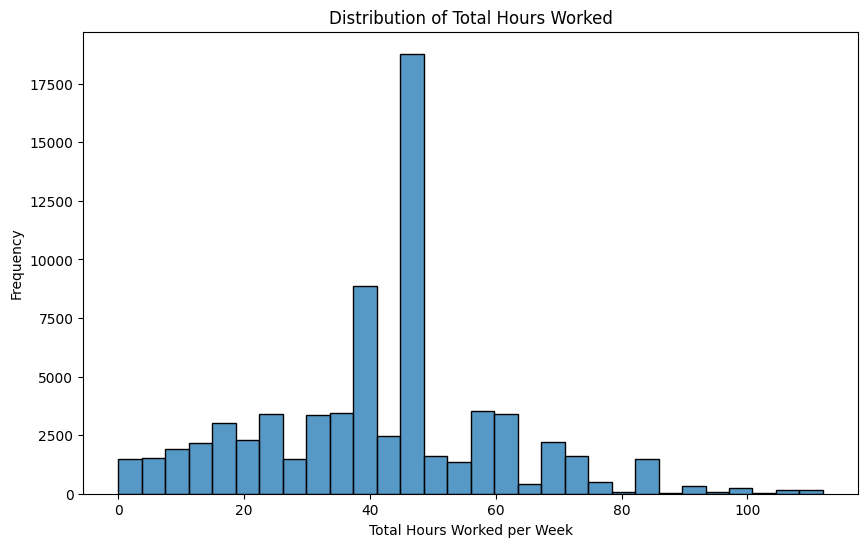

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(classification_task1_df["total_hrs"], bins=30)  # Histogram
plt.xlabel("Total Hours Worked per Week")
plt.ylabel("Frequency")
plt.title("Distribution of Total Hours Worked")
plt.show()

The boxplot shows the distribution of total hours worked per week. Most values are within are within a certain range, but there are many outliers, especially on the higher end (above 80 hours per week). These outliers indicate people who work significantly more or less than usual range. The whiskers of the boxplot represents the spread of most of the data, while the dots outside show extreme values. The Interquartile Range method was used to identify outliers. In this case, 4356 data points fall outside the calculated lower and upper bounds, which means they are considered unusual compared to others. 

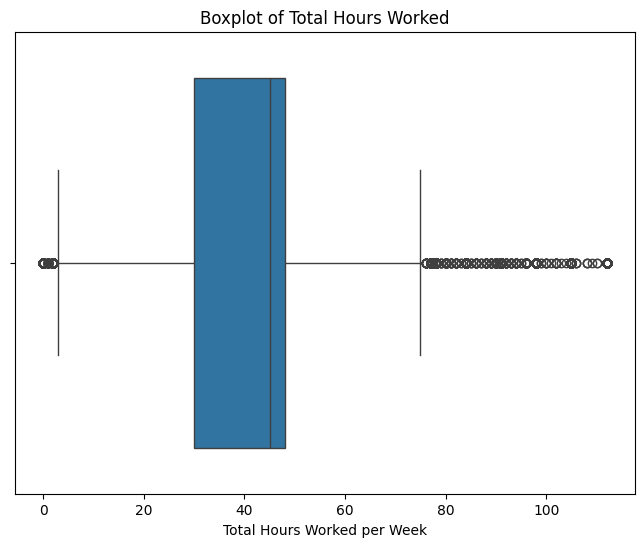

Number of Outliers in total_hrs: 4356


In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=classification_task1_df["total_hrs"])
plt.xlabel("Total Hours Worked per Week")
plt.title("Boxplot of Total Hours Worked")
plt.show()

Q1 = classification_task1_df['total_hrs'].quantile(0.25)
Q3 = classification_task1_df['total_hrs'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = classification_task1_df[(classification_task1_df['total_hrs'] < lower_bound) | (classification_task1_df['total_hrs'] > upper_bound)]
print("Number of Outliers in total_hrs:", len(outliers))

Using Interquartile Range and boxplot visualization, we can observe that there are **4356** identified outliers in the total_hrs column. These outliers deviate from the rest of the data distribution which can be found outside the Turkey fences.

In this step, feature engineering is applied by creating a new feature called `work_category`, which classifies individuals as underworked, normal, and overworked. Using a binning approach, `total_hrs` is segmented into three categories: 
- Underworked (<40 hours),
- Normal (40–48 hours), and 
- Overworked (>48 hours). 

 Additionally, an ordinal encoding is introduced through the `work_category_ordinal` feature, mapping the categorical values to numeric labels: 0 for Underworked, 1 for Normal, and 2 for Overworked to enhance the compatibility when numerical inputs is required while preserving the logical order of the work category/level.

DOLE ADVISORY NO. 02, S. 2004 - IMPLEMENTATION OF COMPRESSED WORKWEEK SCHEMES - Supreme Court E-Library. (n.d.). https://elibrary.judiciary.gov.ph/thebookshelf/showdocs/10/40740

In [24]:
bins = [0, 40, 48, float('inf')]
labels = ['Underworked', 'Normal', 'Overworked']
ordinal_mapping = {'Underworked': 0, 'Normal': 1, 'Overworked': 2}

classification_task1_df.loc[:, 'work_category'] = pd.cut(classification_task1_df['total_hrs'], bins=bins, labels=labels, right=True, include_lowest=True)
classification_task1_df.loc[:, 'work_category_ordinal'] = classification_task1_df['work_category'].map(ordinal_mapping).astype(int)

print(classification_task1_df['work_category'].value_counts())


work_category
Underworked    32822
Normal         21300
Overworked     17233
Name: count, dtype: int64


The variable work_48hrs indicates the reason of a respondent for working for more than 48 hours in the previous week. Hence, it is indicated as null for rows where a person is not overworked. To further prove this assumption, we investigate if this variable perfectly relates to the target variable work_category, specifically the Overworked status.

In [25]:
# Investigate work_48hrs variable's relationship to overworked status
overworked_df = classification_task1_df[classification_task1_df['work_category'] == 'Overworked']

# Check if all non-null work_48hrs values are found in the Overworked category
# Filter rows where work_48hrs is NOT null
non_null_work_48hrs_df = classification_task1_df.dropna(subset=['work_48hrs'])

# Check unique work categories for non-null work_48hrs
unique_categories = non_null_work_48hrs_df['work_category'].unique()
print(unique_categories)

['Overworked']
Categories (3, object): ['Underworked' < 'Normal' < 'Overworked']


Since all non-null work_48hrs values are found in the Overworked category, this confirms that the feature perfectly predicts the target variable. Due to this, it is essential to remove it in our feature set to avoid data leakage in model training.

In [26]:
classification_task1_df.drop("work_48hrs", axis=1, inplace=True)

## Feature Selection

This step of the analysis aims to understand how work_category relates to other numerical features, such as total_hrs, norm_working_hrs, and num_hrs_worked, in the dataset by computing ANOVA test.  The results show that the features total_hrs, norm_working_hrs, and num_hrs_worked are important in distinguishing between groups (e.g., underworked, normal, and overworked individuals). This is evident from their extremely high F-scores, which show how much variance exists between groups, suggesting that the differences are unlikely to be due to chance alone. Additionally, all three features have p-values of 0.0, meaning there is an extremely low probability that these differences occurred by chance. Since these features show significant variation across different categories, they are likely important in predicting the target variable.

In [27]:
X = classification_task1_df[["total_hrs", "norm_working_hrs", "num_hrs_worked"]]
y = classification_task1_df['work_category']

F_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({"Feature": X.columns, "F-Score": F_scores, "p-value": p_values})

anova_results.sort_values(by="p-value", inplace=True)

# Display results
print("\nANOVA Test Results:")
print(anova_results)

significant_numerical_features = anova_results[anova_results["p-value"] < 0.05]["Feature"].tolist()
print("\nSignificant Features (p < 0.05):", significant_numerical_features)


ANOVA Test Results:
            Feature       F-Score  p-value
0         total_hrs  82738.290970      0.0
1  norm_working_hrs  21779.286192      0.0
2    num_hrs_worked  67614.824071      0.0

Significant Features (p < 0.05): ['total_hrs', 'norm_working_hrs', 'num_hrs_worked']


For categorical features, we employ the chi-square test for selecting relevant features when predicting work_category because this test measures the relationship between categorical variables. 

In [28]:
# One hot encoding categorical columns
task1_categorical_cols = classification_task1_df.select_dtypes(include=['object']).columns.tolist()

classification_task1_df_encoded = pd.get_dummies(classification_task1_df, columns=task1_categorical_cols)
print(f"One-Hot Encoded Data using Pandas:\n{classification_task1_df_encoded}\n")

X_chi2 = classification_task1_df_encoded.select_dtypes(['bool'])
y_chi2 = classification_task1_df["work_category_ordinal"]

# Performing chi-square test
task1_chi2_scores = chi2(X_chi2, y_chi2)
print(task1_chi2_scores)

One-Hot Encoded Data using Pandas:
        region  urban_or_rural  hh_size  sex  age  cur_sch  grad_tech  work  \
0            1               2        3    1   49     <NA>          2     1   
1            1               2        3    2   61     <NA>          2     1   
2            1               2        3    1   19        2          2     1   
3            1               2        4    1   48     <NA>          2     1   
4            1               2        4    2   41     <NA>          2     1   
...        ...             ...      ...  ...  ...      ...        ...   ...   
180848      17               2        6    1   25     <NA>          2     1   
180850      17               2        7    1   34     <NA>          2     1   
180851      17               2        7    2   32     <NA>          2     1   
180857      17               2        5    1   29     <NA>          2     1   
180861      17               2        5    1   18        2          2     1   

         job  no

<AxesSubplot: >

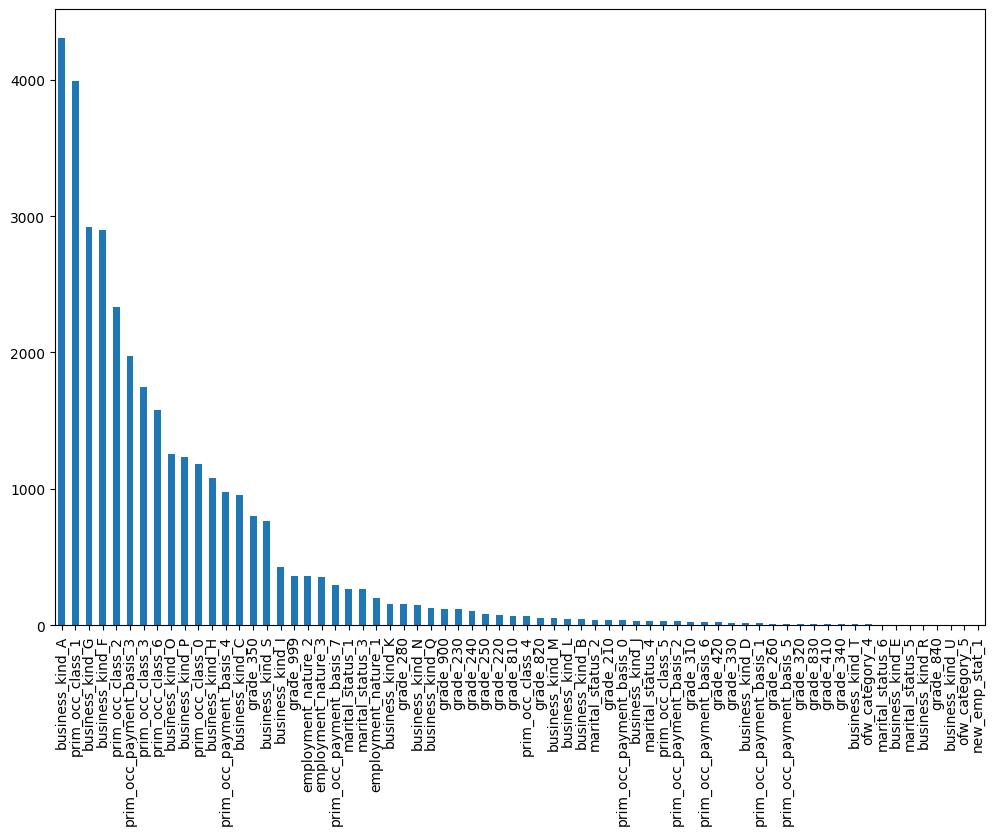

In [29]:
# Chi-square test scores of classification task 1's categorical features
task1_chi_values = pd.Series(task1_chi2_scores[0], index=X_chi2.columns)
task1_chi_values.sort_values(ascending=False, inplace=True)
task1_chi_values.plot.bar(figsize=(12, 8))

<AxesSubplot: >

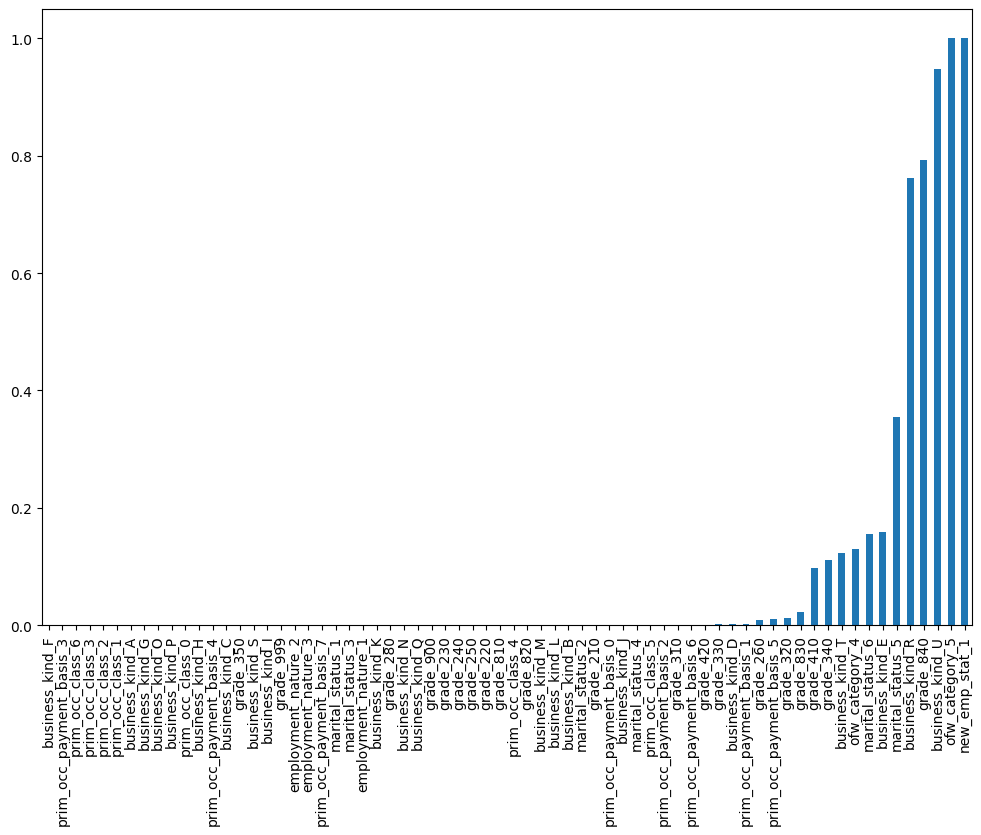

In [30]:
# P-values of classification task 1's categorical features
# if p-value < 0.05, categorical variable is significantly correlated to work_category
task1_p_values = pd.Series(task1_chi2_scores[1], index=X_chi2.columns)
task1_p_values.sort_values(ascending=True, inplace=True)
task1_p_values.plot.bar(figsize=(12, 8))


In [31]:
chi2_selector = SelectKBest(chi2, k=10)
X_chi2_kbest = chi2_selector.fit_transform(X_chi2, y_chi2)

# Get the column names of selected features
significant_categorical_features = X_chi2.columns[chi2_selector.get_support()]
print(significant_categorical_features.tolist())

print('Original number of categorical features:', X_chi2.shape[1])
print('Reduced number of categorical features:', X_chi2_kbest.shape[1])


['business_kind_A', 'business_kind_F', 'business_kind_G', 'business_kind_O', 'business_kind_P', 'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3', 'prim_occ_class_6', 'prim_occ_payment_basis_3']
Original number of categorical features: 68
Reduced number of categorical features: 10


We use sklearn's SelectKBest class to find the top 10 features with the highest chi square scores by selecting those with the lowest p-values. Lower p-values (usually < 0.05) suggests statistical significance towards the target variable and may be relevant for its prediction. The ten features found to be relevant are: 

We use sklearn's SelectKBest class to find the top 10 features with the highest chi square scores by selecting those with the lowest p-values. Lower p-values (usually < 0.05) suggests statistical significance towards the target variable and may be relevant for its prediction. The ten features found to be relevant in predicting `work_category`: 

- `business_kind_A` (Agriculture, Forestry, and Fishing industry)  
- `business_kind_F` (Construction industry)  
- `business_kind_G` (Wholesale & Retail Trade industry)  
- `business_kind_O` (Public Administration & Defense; Compulsory Social Security industry)
- `business_kind_P` (Education industry)  
- `prim_occ_class_1` (Private Establishment worker)  
- `prim_occ_class_2` (Government employee)  
- `prim_occ_class_3` (Self-employed without any paid employee)  
- `prim_occ_class_6` (Worked without pay in family-operated business)  
- `prim_occ_payment_basis_3` (Daily)  

In [32]:
# Finalize classification task 1's dataframe
# Combining numerical and categorical features
remaining_cols_T1 = significant_numerical_features
remaining_cols_T1.extend(significant_categorical_features.tolist() + ['work_category_ordinal', 'work_category'])

classification_task1_df = classification_task1_df_encoded[remaining_cols_T1].copy()
print("Remaining columns after dropping:", classification_task1_df.columns.tolist())

Remaining columns after dropping: ['total_hrs', 'norm_working_hrs', 'num_hrs_worked', 'business_kind_A', 'business_kind_F', 'business_kind_G', 'business_kind_O', 'business_kind_P', 'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3', 'prim_occ_class_6', 'prim_occ_payment_basis_3', 'work_category_ordinal', 'work_category']


In [33]:
classification_task1_df['total_hrs'].isnull().sum()

0

Final check of the cleaned dataset.

In [34]:
classification_task1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71355 entries, 0 to 180861
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   total_hrs                 71355 non-null  Int64   
 1   norm_working_hrs          71355 non-null  Int64   
 2   num_hrs_worked            71355 non-null  Int64   
 3   business_kind_A           71355 non-null  bool    
 4   business_kind_F           71355 non-null  bool    
 5   business_kind_G           71355 non-null  bool    
 6   business_kind_O           71355 non-null  bool    
 7   business_kind_P           71355 non-null  bool    
 8   prim_occ_class_1          71355 non-null  bool    
 9   prim_occ_class_2          71355 non-null  bool    
 10  prim_occ_class_3          71355 non-null  bool    
 11  prim_occ_class_6          71355 non-null  bool    
 12  prim_occ_payment_basis_3  71355 non-null  bool    
 13  work_category_ordinal     71355 non-null  int64   

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+

<hr>

# V. Exploratory Data Analysis

### Classification Task #1

In this section, we will be having an Exploratory Data Analysis to have more of an understanding of our dataset with a specific focus on overworking classification. The objective is to uncover meaningful patterns and relationships that can inform our modeling strategy. To guide this analysis, we aim to address several key questions:
- What is the distribution of `total_hrs` across the three work categories?
- What is the overall distribution of work categories?
- How does the gap between actual and normal working hours differ among underworked, normal, and overworked individuals?
- Which industry has the highest proportion of overworked individuals?
- Which class of worker have the highest proportion of overworked individuals?
- Are daily wage workers more likely to be underworked, normal, or overworked?

This EDA will serve as the foundation for identifying influential features, understanding labor dynamics, and guiding subsequent steps developing in our classification models later.


In [35]:
classification_task1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71355 entries, 0 to 180861
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   total_hrs                 71355 non-null  Int64   
 1   norm_working_hrs          71355 non-null  Int64   
 2   num_hrs_worked            71355 non-null  Int64   
 3   business_kind_A           71355 non-null  bool    
 4   business_kind_F           71355 non-null  bool    
 5   business_kind_G           71355 non-null  bool    
 6   business_kind_O           71355 non-null  bool    
 7   business_kind_P           71355 non-null  bool    
 8   prim_occ_class_1          71355 non-null  bool    
 9   prim_occ_class_2          71355 non-null  bool    
 10  prim_occ_class_3          71355 non-null  bool    
 11  prim_occ_class_6          71355 non-null  bool    
 12  prim_occ_payment_basis_3  71355 non-null  bool    
 13  work_category_ordinal     71355 non-null  int64   

In [36]:
work_category_palette= {
    "Underworked": "#D78133",  
    "Normal": "#4E5E31",      
    "Overworked": "#AD2024"   
}

## 1. What is the distribution of `total_hrs` across the three work categories?

/tmp/ipykernel_71/3634021100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='work_category', y='total_hrs', data=classification_task1_df, palette=work_category_palette)


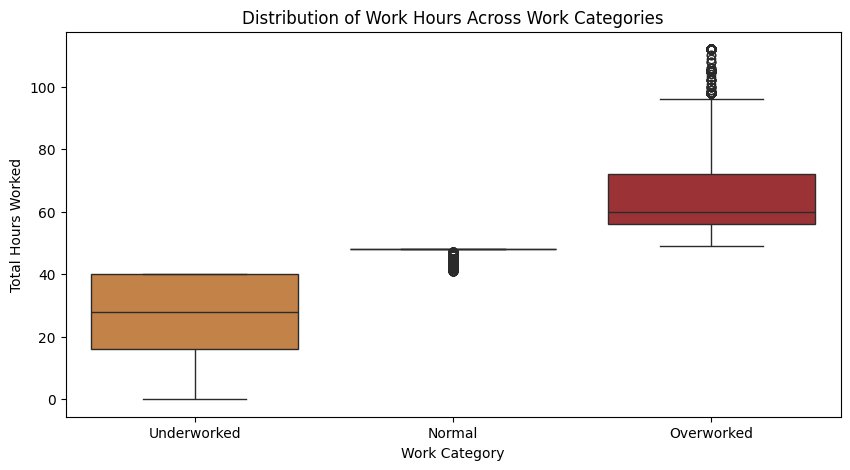

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='work_category', y='total_hrs', data=classification_task1_df, palette=work_category_palette)
plt.xlabel("Work Category")
plt.ylabel("Total Hours Worked")
plt.title("Distribution of Work Hours Across Work Categories")
plt.show()

In [38]:
summary_stats = classification_task1_df.groupby('work_category_ordinal', observed=True)['total_hrs'].describe()
print("Summary Statistics for Total Hours Worked by Work Category:\n")
display(summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])


Summary Statistics for Total Hours Worked by Work Category:



,count,mean,std,min,25%,50%,75%,max
work_category_ordinal,,,,,,,,
0,32822.0,25.933337,12.361,0.0,16.0,28.0,40.0,40.0
1,21300.0,47.225587,1.925548,41.0,48.0,48.0,48.0,48.0
2,17233.0,65.411768,12.932773,49.0,56.0,60.0,72.0,112.0


The analysis of total work hours across different work categories reveals significant variations in labor distribution.

*   The **Underworked** category which comprises the largest group with 46% of the population, has an average workweek of approximately **25.9 hours** with a wide variation (standard deviation of 12.36 hours). Work hours in this category range from 0 hours to a maximum of 40 hours. The median workweek is 28.0 hours implying that at least half of these individuals work significantly below full-time hours.

*   The **Normal** category consists of 30% of population and demonstrates highly consistent work schedule, with an average of 47.2 hours per week. The quartiles all depicts a strict 48-hour workweek which indicates that most individuals in this group follow to a standard full-time employment work period with a **low standard deviation of 1.93 hours.

*   The **Overworked** category, 24% of the dataset, shows the most extreme work conditions, with an average workweek of 65.4 hours and a standard deviation of 12.9 hours. Work hours range from 49 to an astonishing 72 hours per week which reveals a segment of workers facing excessive workloads. The median workweek is 60 hours.

## 2. What is the overall distribution of work categories?

/tmp/ipykernel_71/1909161774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=classification_task1_df, x='work_category', palette=work_category_palette)


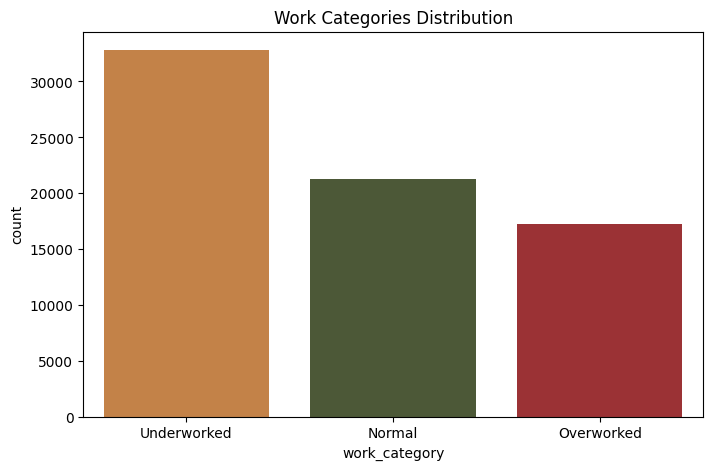

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=classification_task1_df, x='work_category', palette=work_category_palette)
plt.title("Work Categories Distribution")
plt.show()

In [40]:
work_category_counts = classification_task1_df["work_category"].value_counts()
work_category_percentages = classification_task1_df["work_category"].value_counts(normalize=True) * 100
summary_distribution = pd.DataFrame({"Count": work_category_counts, "Percentage (%)": work_category_percentages})
display(summary_distribution)

,Count,Percentage (%)
work_category,,
Underworked,32822,45.998178
Normal,21300,29.850746
Overworked,17233,24.151076


Nearly half (46%) of the dataset falls into the Underworked category. The Normal category comprises nearly 30%, while the overworked category accounts for 24% which implies a notable portion of individuals are experiencing excessive workload demands. This imbalance may suggest inefficiency in workload distribution in the workforce given the dataset used. Further EDA analyses explore compounding factors influencing these trends

## 3. How does the gap between actual and normal working hours differ among underworked, normal, and overworked individuals?

/tmp/ipykernel_71/4135988495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=classification_task1_df, x='work_category', y='work_hours_gap', palette=work_category_palette)


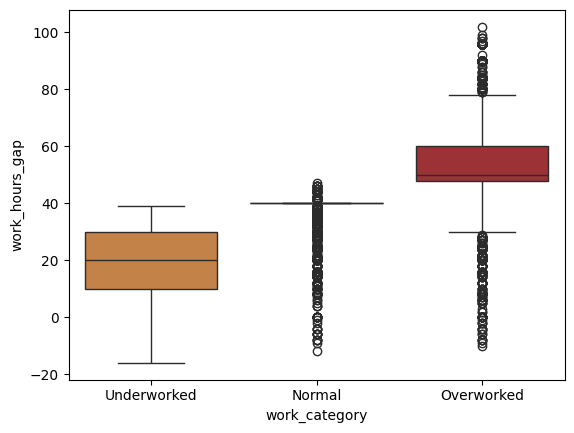

In [41]:
# Difference between num_hrs_worked and norm_working_hrs for each work category
classification_task1_df["work_hours_gap"] = classification_task1_df['num_hrs_worked'] - classification_task1_df['norm_working_hrs']
sns.boxplot(data=classification_task1_df, x='work_category', y='work_hours_gap', palette=work_category_palette)
plt.show()

In [42]:
summary_stats = classification_task1_df.groupby('work_category', observed=True)['work_hours_gap'].describe()
print("Summary Statistics")
print(summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

Summary Statistics
                 count       mean        std   min   25%   50%   75%    max
work_category                                                              
Underworked    32822.0  19.023978  11.550291 -16.0  10.0  20.0  30.0   39.0
Normal         21300.0  38.638169   4.141032 -12.0  40.0  40.0  40.0   47.0
Overworked     17233.0  53.793187  13.021955 -10.0  48.0  50.0  60.0  102.0


- Underworked  individuals have a mean gap of ~19 hrs with wide deviation of 11.5 which implies varying degrees of reduced work hours, the Normal category, on the other hand, has mean gap of ~39 hrs with low deviation 4.1 which suggest consistent adherence to the standard working hours (40 hrs), and Overworked individuals exhibit the highest mean gap of ~54 hrs with high deviation of ~13. This trend depicts significant workload disparities with underworked individuals having excess workload capacity while overworked individuals face unsustainable workload.

## 4. Which industry has the highest proportion of overworked individuals?

/tmp/ipykernel_71/3029127964.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_industry = industry.groupby(['Industry', 'work_category']).size().reset_index(name='Count')


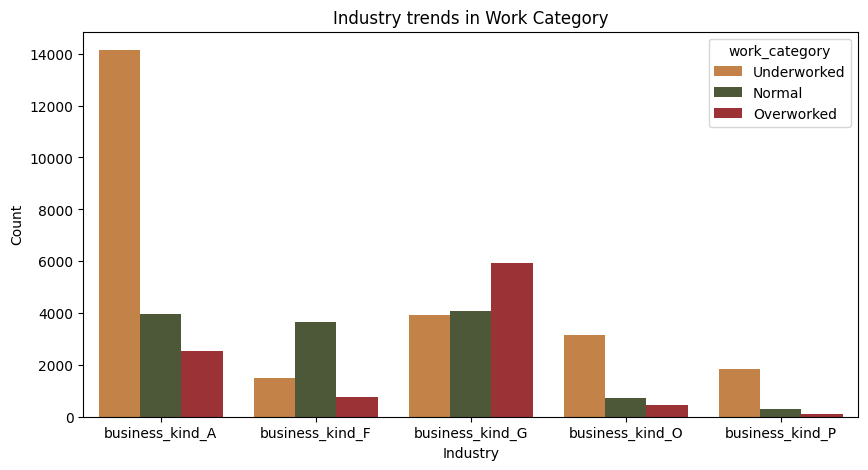

In [43]:
industry_cols = ['business_kind_A', 'business_kind_F', 'business_kind_G', 'business_kind_O', 'business_kind_P']
# industry_work_category = classification_task1_df.groupby(industry_cols)['work_category'].value_counts(normalize=True).unstack()
# industry_work_category.plot(kind='bar', stacked=True, figsize=(10, 5))


industry = classification_task1_df.melt(id_vars=['work_category'], value_vars=industry_cols, var_name='Industry', value_name='In_industry')
industry = industry[industry['In_industry'] == True]

grouped_industry = industry.groupby(['Industry', 'work_category']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Industry', y='Count', hue='work_category', data=grouped_industry, palette=work_category_palette )
plt.title("Industry trends in Work Category")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

In [44]:
# count of work categories within each industry
industry_summary = grouped_industry.pivot_table(index='Industry', columns='work_category', values='Count', fill_value=0)
industry_summary_percentage = industry_summary.div(industry_summary.sum(axis=1), axis=0) * 100

# percentage
industry_summary_percentage = industry_summary.div(industry_summary.sum(axis=1), axis=0) * 100

print("Business Work Category Counts:")
print(industry_summary)
print("\nBusiness Work Category Percentages:")
print(industry_summary_percentage)

Business Work Category Counts:
work_category    Underworked  Normal  Overworked
Industry                                        
business_kind_A      14151.0  3950.0      2517.0
business_kind_F       1480.0  3648.0       760.0
business_kind_G       3936.0  4073.0      5940.0
business_kind_O       3133.0   703.0       464.0
business_kind_P       1849.0   304.0        86.0

Business Work Category Percentages:
work_category    Underworked     Normal  Overworked
Industry                                           
business_kind_A    68.634203  19.158017   12.207780
business_kind_F    25.135870  61.956522   12.907609
business_kind_G    28.217076  29.199226   42.583698
business_kind_O    72.860465  16.348837   10.790698
business_kind_P    82.581510  13.577490    3.841000


- The Agriculture, Forestry, and Fishing industry(Business_kind_A) has the highest count of underworked employees (14,151) which make up ~69% of its workforce with ~19% of individuals having normal workload and ~12% are overworked. 
- In contrary, the Construction industry (Business_kind_F) exhibits a more balanced distribution where ~62% of employees have normal workload while ~25% are underworked and ~13% are overworked.
-  Wholesale & Retail Trade industry (Business_kind_G) shows a significant proportion of overworked employees around ~43%, which is the highest among all industries, with ~29% in the normal range and ~28% underworked. 
 - Public Administration & Defense; Compulsory Social Security and Education Industry (Business_kind_O and business_kind_P) have the highest rates of underworked employees at 72.86% and 82.58% respectively, with a small percentage being overworked. 
 
 This analysis suggests that some industries struggle with high workload while others have a workforce that is predominantly underutilized.

## 5. Which class of worker has the highest proportion of overworked individuals?

/tmp/ipykernel_71/1307664335.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_prim_occ = prim_occ.groupby(['Occupation', 'work_category']).size().reset_index(name='Count')


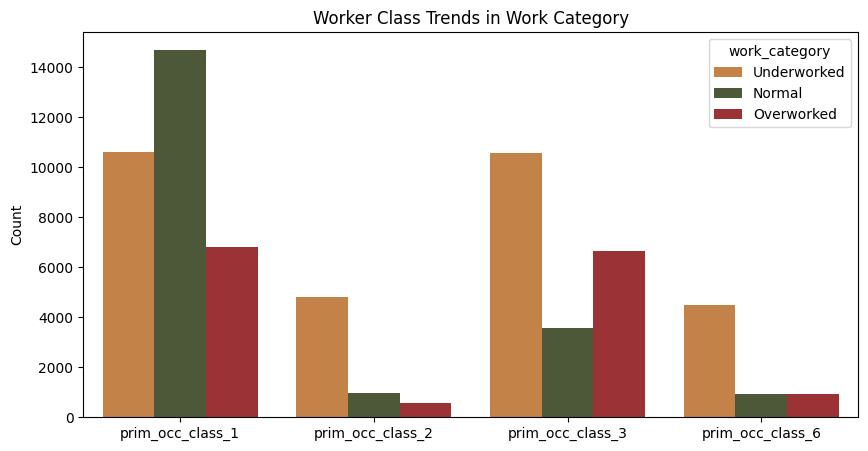

In [45]:
prim_occ_cols = ['prim_occ_class_1','prim_occ_class_2','prim_occ_class_3', 'prim_occ_class_6' ]
prim_occ_cols_category = classification_task1_df.groupby(prim_occ_cols)['work_category'].value_counts(normalize=True).unstack()


prim_occ = classification_task1_df.melt(id_vars=['work_category'], value_vars=prim_occ_cols, var_name='Occupation', value_name='In_occupation')
prim_occ = prim_occ[prim_occ['In_occupation'] == True]

grouped_prim_occ = prim_occ.groupby(['Occupation', 'work_category']).size().reset_index(name='Count')

plt.figure(figsize=(10, 5))
sns.barplot(x='Occupation', y='Count', hue='work_category', data=grouped_prim_occ, palette=work_category_palette )
plt.title("Worker Class Trends in Work Category")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

In [46]:
# Count of work categories within each occupation class
occupation_summary = grouped_prim_occ.pivot_table(index='Occupation', columns='work_category', values='Count', fill_value=0)

# Compute percentages within each occupation class
occupation_summary_percentage = occupation_summary.div(occupation_summary.sum(axis=1), axis=0) * 100

# Display both count and percentage summaries
print("Occupation-wise Work Category Counts:")
print(occupation_summary)

print("\nOccupation-wise Work Category Percentages:")
print(occupation_summary_percentage)


Occupation-wise Work Category Counts:
work_category     Underworked   Normal  Overworked
Occupation                                        
prim_occ_class_1      10580.0  14653.0      6816.0
prim_occ_class_2       4819.0    958.0       550.0
prim_occ_class_3      10562.0   3575.0      6651.0
prim_occ_class_6       4479.0    936.0       909.0

Occupation-wise Work Category Percentages:
work_category     Underworked     Normal  Overworked
Occupation                                          
prim_occ_class_1    33.011950  45.720615   21.267434
prim_occ_class_2    76.165639  15.141457    8.692903
prim_occ_class_3    50.808159  17.197422   31.994420
prim_occ_class_6    70.825427  14.800759   14.373814


- The distribution of work categories across the working classes of the population for their primary occupation shows distinct workload trends. Those who identify as private establishment workers as their primary occupation have a relatively balanced distribution with ~46% of them having a normal workload while ~33% are underworked and ~22% are overworked. 
- Government employees have the highest  proportion of underworked individuals which accounts for ~76% of those who identify as one and has the lowest overworked percentage at around ~9% which implies that this sector has a workforce with reduced workload intensity. 
- On the other hand, self-employed individuals without any paid employees are shown to be overworked (~32%) which is the highest among other classes. Individuals who Worked without pay in family-operated businesses also exhibit a high underworked rate of ~71% similar to those who worked in the government, but with a slightly higher overworked proportion of ~14%. 
These results indicate that workload distribution varies significantly by working class, with certain sector experiencing more intense workloads while others have a surplus of underutilized workers.

## 6. Are daily wage workers more likely to be underworked, normal, or overworked?

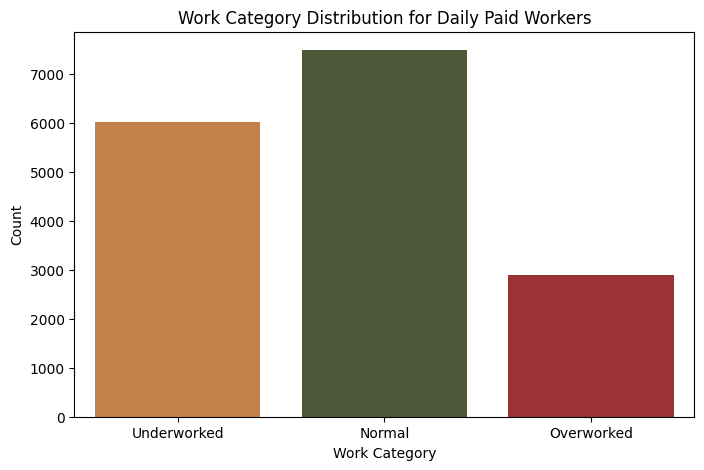

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(data=classification_task1_df[classification_task1_df['prim_occ_payment_basis_3'] == 1], x='work_category', hue = 'work_category', legend=False, palette=work_category_palette)
plt.title("Work Category Distribution for Daily Paid Workers")
plt.xlabel("Work Category")
plt.ylabel("Count")
plt.show()

In [48]:
daily_paid_workers = classification_task1_df[classification_task1_df['prim_occ_payment_basis_3'] == 1]
daily_paid_counts = daily_paid_workers['work_category'].value_counts()
daily_paid_percentages = daily_paid_workers['work_category'].value_counts(normalize=True) * 100
daily_paid_summary = pd.DataFrame({"Count": daily_paid_counts, "Percentage (%)": daily_paid_percentages})
print(daily_paid_summary)

               Count  Percentage (%)
work_category                       
Normal          7497       45.660515
Underworked     6021       36.670930
Overworked      2901       17.668555


The analysis of daily-paid workers' workload distribution reveals that the majority fall within the normal category, 46%, which implies a balanced workload for nearly half of these workers. However, a significant portion, 36%, is underworked suggesting that a number of them are not fully engaged in work. Meanwhile, 18% of daily-paid workers are overworked. This distribution depicts variability in work allocation among daily-paid workers, with some experiencing underemployment while others face high work demands.

<hr>

# VI. Initial Model Training

In this section, we train and evaluate three different machine learning models for our classification task. The models we used are K-Nearest Neighbors (KNN), Multinomial Logistic Regression, and Neural Networks. Each model was chosen based on its suitability for the dataset and classification problem. 

## K-Nearest Neighbors

K-Nearest Neighbors (KNN) was used for classifying overwork status (underworked, normal, overworked) because it is a straightforward and effective method for grouping similar data points. Since work status depends on both numerical values (such as hours worked) and categorical factors (such as business type and occupation class), KNN can compare individuals with similar characteristics to make predictions. Instead of relying on predefined assumptions about the given data, KNN directly bases its predictions on observed data. It classifies new instances by looking at the most similar examples rather than learning complex rules, making it a flexible choice when the relationship between features and overwork status is not strictly linear, as overwork status is influenced by multiple factors beyond just hours worked. It is not simply a matter of 'If X hours > Y, then overworked. 

This step creates a copy of the dataset to ensure that any modifications made for KNN do not affect the original dataset, which will be used for other models. The features are then divided into two groups: numerical features, which include continuous values like working hours, and categorical features, which consist of one-hot encoded variables such as business type and occupation class. 

In [49]:
knn_df = classification_task1_df.copy()

numerical_features = ['norm_working_hrs', 'num_hrs_worked']
categorical_features = [
    'business_kind_A', 'business_kind_F', 'business_kind_G',
    'business_kind_O', 'business_kind_P', 
    'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3',
    'prim_occ_class_6', 'prim_occ_payment_basis_3'
]
print(f'knn_df.shape: ', knn_df.shape)

knn_df.shape:  (71355, 16)


This step prepares the dataset for training by making sure all features are in the correct format for the KNN model.

First, the categorical features, which were previously stored as Boolean values (True/False), are converted into integers (1 and 0). This transformation is necessary because KNN requires numerical inputs, as it is a distance-based algorithm. Converting categorical values into numbers ensures that the model can correctly compute similarities between data points and make accurate classifications.

Next, the input features (X) and target variable (y) are extracted. X includes both numerical and categorical features, while y represents the target variable, work_category. Since work_category is a categorical variable, it is encoded into numerical values using .astype('category').cat.codes.values, which assigns a unique number to each category (e.g., 0 for Underworked, 1 for Normal, and 2 for Overworked). This ensures that the classification model can interpret the target variable correctly.

Lastly, numerical features are standardized using StandardScaler(). Since KNN is a distance-based algorithm, features with larger values could dominate others, leading to biased predictions. Standardization ensures that all numerical features have a mean of 0 and a standard deviation of 1, putting them on the same scale. 

In [50]:
# Convert categorical (boolean) features into int
knn_df[categorical_features] = knn_df[categorical_features].astype(int)

# Extract input features and target variable
X = knn_df[numerical_features + categorical_features].values
y = knn_df['work_category'].astype('category').cat.codes.values 

# Standardize numerical features 
scaler = StandardScaler()
X[:, :len(numerical_features)] = scaler.fit_transform(X[:, :len(numerical_features)])

This step splits the dataset into training and testing sets to ensure that the KNN model is trained on one portion of the data and evaluated on another. This helps assess the model’s performance on unseen data, preventing overfitting.

The train_test_split function is used to divide the data, with 80% assigned for training (X_train_knn, y_train_knn) and 20% for testing (X_test_knn, y_test_knn). The test_size=0.2 argument ensures that exactly 20% of the dataset is set aside for testing. The random_state=42 ensures that the split is reproducible, meaning that running the code multiple times will always produce the same train-test split.

In [51]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train_knn.shape)
print(X_test_knn.shape)
print(y_train_knn.shape)
print(y_test_knn.shape)

(57084, 12)
(14271, 12)
(57084,)
(14271,)


This step trains and evaluates the KNN model to classify overwork status (underworked, normal, or overworked).

First, a KNN classifier is created using KNeighborsClassifier(n_neighbors=5). The parameter n_neighbors=5 means that the model will classify each data point based on the majority class of its five closest neighbors in the feature space. Choosing an appropriate value for (hyperparameter) k is important because too small a value can make the model sensitive to noise, while too large a value can cause it to overlook important patterns. 


Next, the model is trained on the training dataset using knn.fit(X_train_knn, y_train_knn). This step does not involve traditional training like other machine learning models because KNN is a lazy learning algorithm, it simply stores the training data and uses it to classify new instances during prediction.

After training, we made predictions on the test set and then compared them to the actual test labels to evaluate the model's accuracy.

This step trains and evaluates the KNN model to classify overwork status (underworked, normal, or overworked).

First, a KNN classifier is created using KNeighborsClassifier(n_neighbors=5). The parameter n_neighbors=5 means that the model will classify each data point based on the majority class of its five closest neighbors in the feature space. Choosing an appropriate value for (hyperparameter) k is important because too small a value can make the model sensitive to noise, while too large a value can cause it to overlook important patterns. 

When creating the KNeighbors classifier, other parameters were set to their default values:

- weights='uniform': All neighbors have equal influence on the classification.
- algorithm='auto': The best algorithm (ball_tree, kd_tree, or brute) is selected automatically based on the dataset size.
- leaf_size=30: This affects the speed of BallTree or KDTree algorithms. A smaller value makes the tree more detailed but slower, while a larger value speeds up computation but may reduce accuracy.
- metric='minkowski': This defines how distances between points are measured. The default is the Minkowski distance.
- p=2: Since Minkowski distance is used, p=2 makes it equivalent to Euclidean distance (L2 norm), which is the most common distance measure.
- metric_params=None: No additional parameters were provided for distance calculation.
- n_jobs=None: The classifier runs on a single processor core by default, meaning computations are not parallelized.

As for k (the number of neighbors), the commonly used default value is 5 because it provides a good balance between bias and variance. A smaller k (e.g., 1) can make the model too sensitive to noise, while a larger k (e.g., 10 or more) smooths the decision boundary too much, potentially reducing accuracy. Using k=5 helps maintain stability while capturing patterns in the data effectively. (GeeksforGeeks, 2025; Abba, 2023)

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)

print("Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn))

Accuracy: 0.9568355406068251

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      6564
           1       0.96      0.94      0.95      4260
           2       0.97      0.92      0.94      3447

    accuracy                           0.96     14271
   macro avg       0.96      0.95      0.95     14271
weighted avg       0.96      0.96      0.96     14271



The evaluation results show that the KNN model achieved an accuracy of 95.68%, indicating that it correctly classified most instances of overwork status (underworked, normal, overworked). Looking at the classification report, precision, recall, and F1-scores for each class are all high, suggesting that the model performs well across all categories.

### k-Fold Cross-Validation

This step performs k-fold cross-validation to find the best value of k for the K-Nearest Neighbors (KNN) model. The goal is to test different values of k and determine which one gives the highest accuracy.

First, the code defines k_folds = 5, meaning the dataset will be split into 5 equal parts for cross-validation. The k_choices list contains different values of k that will be tested, ranging from 1 to 100. The scores array is created to store the cross-validation accuracy scores for each k.

Finally, the code selects the best k value using np.argmax(avg_scores), which finds the index of the highest average accuracy and retrieves the corresponding k from k_choices. This process ensures that the chosen k is not based on a single train-test split but is validated across multiple runs, making the model more reliable and reducing the risk of overfitting or underfitting.

In [53]:
k_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
scores = np.zeros((len(k_choices), k_folds))

for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    
    model = KNeighborsClassifier(n_neighbors=k_choices[i])
    cv_scores = cross_val_score(model, X_train_knn, y_train_knn, cv=k_folds)
    scores[i, :] = cv_scores
    pass

avg_scores = np.mean(scores, axis=1)

best_k = k_choices[np.argmax(avg_scores)]
print(f"Best k based on cross-validation: {best_k}")

k is : 1
k is : 3
k is : 5
k is : 8
k is : 10
k is : 12
k is : 15
k is : 20
k is : 50
k is : 100
Best k based on cross-validation: 8


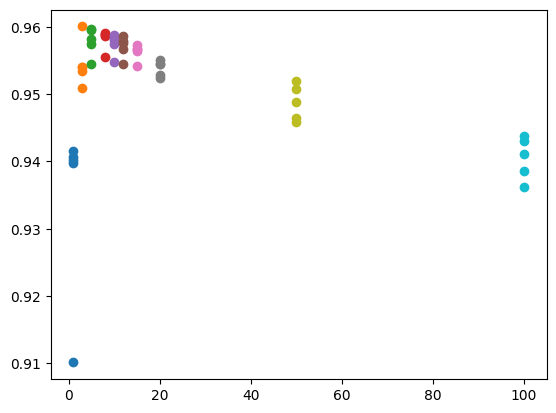

In [54]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

This code visualizes the cross-validation results for different values of k in KNN by plotting the average accuracy along with error bars that represent the standard deviation of the accuracy scores across different folds.

Text(0, 0.5, 'Cross-validation accuracy')

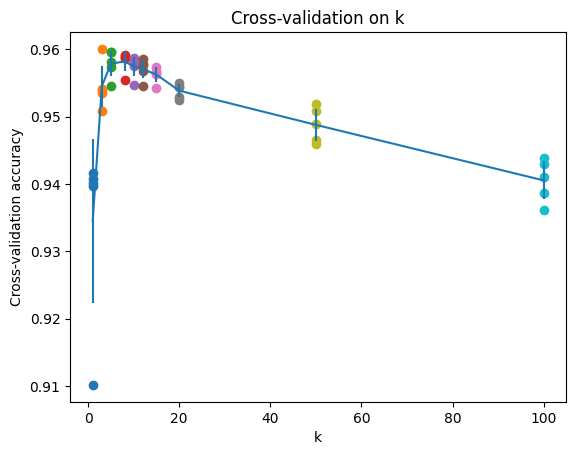

In [55]:
avg_scores = np.mean(scores, axis=1)
stddev_scores = np.std(scores, axis=1)

plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

This step trains a K-Nearest Neighbors (KNN) model with k=8, makes predictions on the test data, and manually calculates the accuracy of the model.

In [56]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_knn, y_train_knn)

y_predicted_knn = knn.predict(X_test_knn)

num_correct_knn = np.sum(y_predicted_knn == y_test_knn)

num_test_knn = X_test_knn.shape[0]

accuracy_knn = num_correct_knn / num_test_knn

print("Got %d / %d correct => accuracy: %f" % (num_correct_knn, num_test_knn, accuracy_knn))

Got 13705 / 14271 correct => accuracy: 0.960339


The results show that the KNN model achieved an accuracy of 96.03%, correctly classifying 13,705 out of 14,271 test samples. This means that when given a new instance, the model was able to find the most similar training examples and assign the correct work category (underworked, normal, or overworked) 96% of the time.

In [57]:
print("\nClassification Report:\n", classification_report(y_test_knn, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      6564
           1       0.96      0.94      0.95      4260
           2       0.97      0.92      0.94      3447

    accuracy                           0.96     14271
   macro avg       0.96      0.95      0.95     14271
weighted avg       0.96      0.96      0.96     14271



After adjusting the KNN hyperparameter from k=5 to k=8, we observed a small improvement in accuracy, increasing from 95.68% to 96.03%. This suggests that using more neighbors helped the model make slightly more reliable predictions. 

However, despite this small improvement in accuracy, the precision, recall, and F1-scores remain nearly the same across all three overwork status categories (underworked, normal, and overworked). This indicates that while increasing k slightly refined the model’s decision-making, it did not have huge impact on classification performance.

## Multinomial Logistic Regression

To prepare the dataset for Multinomial Logistic Regression, we first create a copy of the `classification_task1_df` dataframe. The predictors consists of numerical and categorical features where the former consist continuous values while the latter consist of boolean values.

In [58]:
mlr_df = classification_task1_df.copy()
numerical_features = ['norm_working_hrs', 'num_hrs_worked']
categorical_features = [
    'business_kind_A', 'business_kind_F', 'business_kind_G',
    'business_kind_O', 'business_kind_P', 
    'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3',
    'prim_occ_class_6', 'prim_occ_payment_basis_3'
]
print(f'mlr_df.shape: ', mlr_df.shape)

mlr_df.shape:  (71355, 16)


Categorical features are encoded as integers since MLR requires numerical input. Further, the response variable is also encoded as categorical integers codes to align with MLR. Lastly, numerical features are standardized to ensure that the predictors have a mean of 0 and deviation of 1. 

In [59]:
# Convert categorical (boolean) features into int
mlr_df[categorical_features] = mlr_df[categorical_features].astype(int)

# Extract input features and target variable
X = mlr_df[numerical_features + categorical_features].values
y = mlr_df['work_category'].astype('category').cat.codes.values 

# Standardize numerical features 
scaler = StandardScaler()
X[:, :len(numerical_features)] = scaler.fit_transform(X[:, :len(numerical_features)])

The dataset are the split with train, validation, and test sets. 80% of it is allocated for training, and 20% is allocated for testing. Then, the training set is further split into training and validation sets, 60% and 20% respectively. Lastly, stratification was applied to ensure evenly class distribution remains consistent across all splits. 

For training the MLR model, we utilizes the `SGDClassifier` from scikit-learn which applies stochastic gradient descent to optimize the loss function. We define `log_loss` as the loss function which corresponds to multinomial logistic regression. The learning rate(`eta0`) is set to 0.1 which updates the model with small increments. By using `constant` learning rate schecule, excessive fluctuation in weight updates could be avoided which allows the model to converge gradually.

In [60]:
 # Split into train (80%) and test (20%) sets
mlr_X_train, mlr_X_test, mlr_y_train, mlr_y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split train into training(60%) and validation(20%) 
mlr_X_train, mlr_X_val, mlr_y_train, mlr_y_val = train_test_split(mlr_X_train, mlr_y_train, test_size=0.25, random_state=42, stratify=mlr_y_train)


# MLR with GD
MLR_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=42)

print(f'X_train:', mlr_X_train.shape)
print(f'X_val:', mlr_X_val.shape)
print(f'X_test:', mlr_X_test.shape)
print(f'y_train:', mlr_y_train.shape)
print(f'y_val:', mlr_y_val.shape)
print(f'y_test:', mlr_y_test.shape)

X_train: (42813, 12)
X_val: (14271, 12)
X_test: (14271, 12)
y_train: (42813,)
y_val: (14271,)
y_test: (14271,)


The dataset is split into training, validation, and test sets with each containing 12 predictors. The training set consists of 42, 813 samples which will be used for training the model. Both the validation and test sets contai 14, 271 sample observations, which the validation set used for hyperparameter tuning and test set reserved for final performance evaluation. 

For the target feature `y`, the training label also consist 42,813 samples, while the validation and test sets consist of 14,271 labels.

In [61]:
labels = np.unique(y)

Mini-batch Gradient Descent is implemented through the `DataLoader` class. This class manages data shuffling and beatch creation. The model's weights are updated for each batch iteratively, with batch size of 10, by selecting sma;ll rnadome subset of the dataset. The batch indices are randomly shuffled in each iteration to prevent bias in weight updates. The maximum number of epoch is set to 100.

In [62]:
class DataLoader:
    def __init__(self, X, y, batch_size=10):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.num_samples = len(X)
        self.indices = np.arange(self.num_samples)
        
        np.random.seed(42)
        np.random.shuffle(self.indices)


    def get_batch(self):
        batch_indices = np.random.choice(self.indices, size=self.batch_size, replace=False)
        return self.X[batch_indices], self.y[batch_indices]


In [63]:
# Train with Mini-Batch GD
max_epochs = 100
batch_size = 10
data_loader = DataLoader(mlr_X_train, mlr_y_train, batch_size=batch_size)


During each epoch, a batch is extracted from the DataLoader, and the model is updated using `partial_fit()` emthod which allows incremental learning. After each epoch, the validation loss is computed using the `log_loss` function. If the difference between the validation loss and the previous loss is less than 0.01, the model is considered to have converged and the training stops to prevent overfitting. 

In [64]:
e = 0
is_converged = False
previous_val_loss = float('inf')

train_losses = []
val_losses = []

while e < max_epochs and not is_converged:
    # Train on batches
    X_batch, y_batch = data_loader.get_batch()
    for X_sample, y_sample in zip(X_batch, y_batch):
        MLR_model.partial_fit(np.array([X_sample]), np.array([y_sample]), classes=labels)

    y_train = np.array(mlr_y_train).ravel()
    y_val = np.array(mlr_y_val).ravel()

    # Compute training loss (X_train)
    y_train_pred_proba = MLR_model.predict_proba(mlr_X_train)
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_losses.append(train_loss)

    # Compute validation loss (X_val)
    y_val_pred_proba = MLR_model.predict_proba(mlr_X_val)
    val_loss = log_loss(y_val, y_val_pred_proba)
    val_losses.append(val_loss)

    print(f"Epoch {e+1} | Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")
    
    # Check for convergence (early stopping)
    if abs(previous_val_loss - val_loss) < 0.01:
        is_converged = True
    else:
        previous_val_loss = val_loss
        e += 1


Epoch 1 | Training Loss: 1.0859 | Validation Loss: 1.0859
Epoch 2 | Training Loss: 1.0573 | Validation Loss: 1.0574
Epoch 3 | Training Loss: 1.0352 | Validation Loss: 1.0353
Epoch 4 | Training Loss: 1.0223 | Validation Loss: 1.0225
Epoch 5 | Training Loss: 1.0100 | Validation Loss: 1.0102
Epoch 6 | Training Loss: 0.9935 | Validation Loss: 0.9938
Epoch 7 | Training Loss: 0.9844 | Validation Loss: 0.9847


The MLR model is trained for 7 epochs before convergence. The average training loss at the last epoch is around 0.9844 and the average validation loss is around 0.9847. 

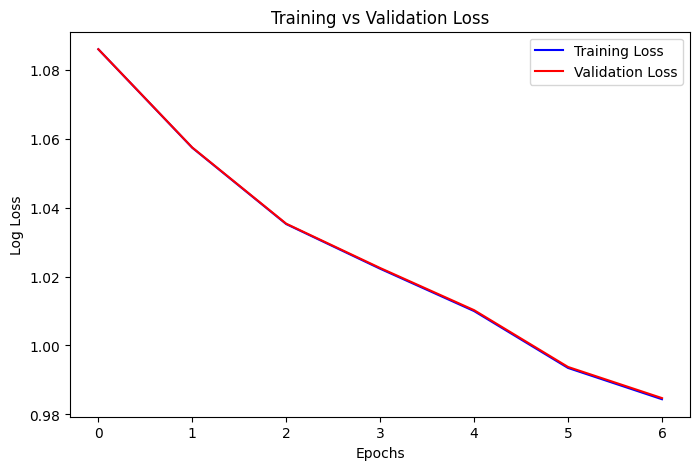

In [65]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_losses)), train_losses, label="Training Loss", color='blue')
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


As the graph shows, both training and validation loss decreases steadily across epochs. Further, both follow a similar trends and remain close to each other which implies that there's no significant gap between training and validation loss.  Hence, the model is not overfitting nor underfitting.

## Neural  Network

As researchers continue to develop computers to mimic human intelligence, Neural Network emerges as a well-known method by taking the human brain's core thinking element, neurons, as inspiration. We find this machine learning model appropriate for classifying whether or not a worker is overworked as it identifies patterns from input data without human intervention. 

To put it simply, Neural Networks work similarly as to how human brains are wired to function. Each neuron contains some input data, performs some calculations, and sends it over to the next neuron. The layered interconnected nature of neurons is what makes neural networks learn patterns from given data (which in this case are the selected features). 

In order to create the neural network, necessary processing of features are done. This step selects the relevant numerical and categorical features. Numerical features are also converted as floats for standardization.

In [66]:
df_nn = classification_task1_df.copy()

numerical_features = ['norm_working_hrs', 'num_hrs_worked']
categorical_features = [
    'business_kind_A', 'business_kind_F', 'business_kind_G',
    'business_kind_O', 'business_kind_P', 
    'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3',
    'prim_occ_class_6', 'prim_occ_payment_basis_3'
]

# Extract input features and target variable

df_nn[categorical_features] = df_nn[categorical_features].astype(int)
df_nn[numerical_features] = df_nn[numerical_features].astype("float64")

X_nn = df_nn[numerical_features + categorical_features].values
y_nn = df_nn['work_category'].astype('category').cat.codes.values

# Standardize numerical features 
scaler = StandardScaler()
X_nn[:, :len(numerical_features)] = scaler.fit_transform(X_nn[:, :len(numerical_features)])

# print(X_nn[:,:len(numerical_features)])

The dataset is then split into train and test sets following an 80/20 split respectively. The train set is then split again with a 75/25 split for training and validation respectively. Keeping in mind that the exploratory data analysis discovered skewed distributions between work categories, it is important to ensure that sets maintain an even distribution of categories. To ensure that work categories are split evenly between sets, splits are stratified along the truth values (y_nn).

In [67]:
# Split data into 80% train and 20% test sets
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, stratify=y_nn, random_state=41, test_size=0.2)

print(X_nn_train.shape)
print(y_nn_train.shape)
print(X_nn_test.shape)
print(y_nn_test.shape)

(57084, 12)
(57084,)
(14271, 12)
(14271,)


The following step prints out the work category distribution in each set to ensure that the categories are proportional across all sets. We find that the Underworked category represents approximately 46% of data in each set, the Normal category represents around 30%, and the Overworked category represents around 24%. This proves that splits are proportional across training, test, and validation sets.

In [68]:
# Sanity Check (Check if split is proportional across all work categories)
print("Work category distribution:", np.bincount(y_nn) / len(y_nn))

print("Work category distribution in training set:", np.bincount(y_nn_train) / len(y_nn_train))
print("Work category distribution in test set:", np.bincount(y_nn_test) / len(y_nn_test))

Work category distribution: [0.45998178 0.29850746 0.24151076]
Work category distribution in training set: [0.45998879 0.29850746 0.24150375]
Work category distribution in test set: [0.45995375 0.29850746 0.24153878]


We will be using PyTorch libraries for the Neural Network implementation. To prep for this, we convert our variables to their appropriate Tensor data types. 

In [69]:
# Convert variables to Tensor datatype
X_nn_train = torch.FloatTensor(X_nn_train)
X_nn_test = torch.FloatTensor(X_nn_test)

y_nn_train = torch.LongTensor(y_nn_train)
y_nn_test = torch.LongTensor(y_nn_test)

The following code contains the implementation of the NeuralNetwork class, subclassing the nn.Module class. The NeuralNetwork class has five methods, namely:

- __init__: This is the constructor which accepts 4 arguments which are the size of input features, a list containing the sizes of each hidden layer, the size of output features, and lastly, the activation function to be used for the hidden layers.

- get_activation_func: This simply just returns the activation function of the neural network.

- create_network: This builds the neural network with input and hidden layers followed by a softmax output layer to allow for multi-class overworked classifications.

- forward: This performs the forward propagation for all layers (except output). As a final step, it returns the final output of the network and the probabilities from the softmax layer.

- init_weights: This initializes the weights and biases for each module. Weights of each nn.Linear module are initialized from a normal distribution with a standard deviation of 0.1 and a mean of 0. All biases are initialized to a constant 0.

In [70]:
class NeuralNetwork(nn.Module):
    # Input Layer (13 features) -> Hiddenlayer 1 -> Hiddenlayer2 -> Output layer (3 classes of overwork)

    def __init__(self, in_features, hidden_layers, out_features, activation):
        super().__init__()

        self.layers = []
        self.in_features = in_features
        self.hidden_layers = hidden_layers
        self.out_features = out_features
        # indicates hidden layers' activation function
        self.activation = activation
        
        self.create_network()
        self.init_weights()

    def get_activation_func(self):
        activations = {
            "relu" : nn.ReLU(inplace=True),
            "tanh" : nn.Tanh(),
            "sigmoid" : nn.Sigmoid()
        }

        if self.activation not in activations:
            print(f"Activation {self.activation} unsupported")
            return

        return activations[self.activation]

    def create_network(self):
        # build neural network layers

        self.layers.append(nn.Linear(self.in_features, self.hidden_layers[0]))
        self.layers.append(self.get_activation_func())

        # for each succeeding hidden layer (excluding output layer)
        rem_layers = len(self.hidden_layers) - 1
        for i in range(rem_layers):
            self.layers.append(nn.Linear(self.hidden_layers[i], self.hidden_layers[i+1]))
            self.layers.append(self.get_activation_func())

        # build output layer (predicts three overwork classes)
        self.layers.append(nn.Linear(self.hidden_layers[-1], 3))
        self.layers.append(nn.Softmax(dim=1))

        self.layers = nn.Sequential(*self.layers)

    def forward(self, x):
        # performs forward propagation

        # get all layers (excluding last layer)
        x = self.layers[:-1](x)
        return x
    
    def init_weights(self):
        # initializes weights and biases
        torch.manual_seed(2)

        for module in self.modules():
            if isinstance(module, nn.Linear):
                # initialize weight to have a mean of 0 and s.d. of 0.1
                nn.init.normal_(module.weight, 0, 0.1)
                # initialize bias to 0
                nn.init.constant_(module.bias, 0)

As we continue analyzing the performance of Neural Networks, hyperparameter tuning will be explored in the latter secionts of this notebook. Taking note of this, we utilize the Skorch library for easy integration between PyTorch and sci-kit learn. This is achieved by providing a wrapper around PyTorch that has an sklearn interface. Specifically, we use the NeuralNetClassifier with the module set to ur custom module, NeuralNetwork.

For our initial model, we configure the neural network with input features corresponding to the size of our training dataset, and two hidden layers with 11 and 6 units, respectively. The output layer has 3 units, representing the three possible classification categories. We use the ReLU activation function for the hidden layers. 

To compute the loss, we apply CrossEntropyLoss, which measures the difference between the model's raw output scores and the target class labels.To optimize the model, we use the Adam optimizer with an initial learning rate of 0.0001, and set the training to run for 10 epochs. 

Under the hood, the NeuralNetClassifier performs a stratified split of the training data, allocating 80% for training and 20% for validation. The training data is shuffled to minimize bias during training. Additionally, we employ a StepLR learning rate scheduler to gradually reduce the learning rate as the model progresses. Specifically, the learning rate is decayed by a factor of 0.1 every 4 epochs. To avoid overfitting, we include an EarlyStopping mechanism, which halts training if the validation performance shows no improvement after 5 epochs.

In [71]:
# Create neural network
network = NeuralNetClassifier(
    module=NeuralNetwork,
    module__in_features=X_nn_train.shape[1],
    module__hidden_layers=(11, 6),
    module__out_features=3,
    module__activation="relu",

    lr=0.0001,
    max_epochs=10,
    batch_size=64,
    criterion=nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,

    iterator_train__shuffle=True,
    callbacks = [EarlyStopping(patience=5), 
                 LRScheduler(policy=StepLR, step_size=10, gamma=0.1)],
)

network.initialize()
print(network)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=NeuralNetwork(
    (layers): Sequential(
      (0): Linear(in_features=12, out_features=11, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=11, out_features=6, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=6, out_features=3, bias=True)
      (5): Softmax(dim=1)
    )
  ),
)


The following code block simply checks if weights and biases are correctly initialized following the criterion of normal distribution with 0.1 standard deviation and 0 mean for weights, and all 0 for biases. 

In [72]:
# Sanity Check (Weights and Biases should be initialized)
linear_layers = []

for layer in network.module_.layers:
    if isinstance(layer, nn.Linear):
        linear_layers.append(layer)

for i in range(len(linear_layers)):
    print(f"Initialized Weights for L{i+1}: ")
    print(linear_layers[i].weight)

    print(f"Initialized Biases for L{i+1}: ")
    print(linear_layers[i].bias)
    print("\n\n")

Initialized Weights for L1: 
Parameter containing:
tensor([[-0.1041,  0.0917, -0.1304, -0.1110, -0.1219,  0.1168, -0.1057, -0.0119,
         -0.0908,  0.0345, -0.0571, -0.0235],
        [ 0.1008, -0.0753, -0.0225, -0.0433, -0.1507, -0.0459, -0.0848,  0.0527,
          0.0030, -0.0050,  0.1065,  0.0886],
        [ 0.0464, -0.0499,  0.0129,  0.2763,  0.0140,  0.1119,  0.0315,  0.1753,
         -0.0765,  0.1830, -0.0278, -0.0272],
        [-0.1294, -0.0024, -0.0235, -0.0709,  0.1157,  0.0430, -0.1187, -0.0747,
         -0.0932, -0.0858, -0.0965, -0.0099],
        [-0.1019,  0.0316, -0.1604,  0.1849,  0.0045,  0.1585, -0.0591,  0.1131,
          0.0756, -0.1202, -0.0583, -0.0441],
        [-0.1979,  0.0779, -0.0775, -0.0140,  0.1141, -0.0635, -0.1470, -0.0213,
         -0.0871,  0.1616, -0.0236,  0.0944],
        [ 0.2113, -0.0975,  0.0176, -0.0132, -0.0274,  0.0336,  0.0189,  0.2143,
          0.0853,  0.0096, -0.0062,  0.0827],
        [ 0.0560, -0.0778,  0.0334,  0.0176,  0.2111,  0.107

The following code block performs the training and validation through Skorch's NeuralNet fit method. This essentially trains and validates a set of batches of size 64 iteratively for 10 epochs. During each epoch, it does the following steps:

- Forward propagation: processes data by batches using forward propagation and computes and records the loss in the network's history 

- Backward propagation: updates the network's parameters based on the computed loss

- Validation: it evaluates the model on the validation set after each epoch

In [73]:
# perform neural network training and validation
network.fit(X_nn_train, y_nn_train)

Re-initializing module because the following parameters were re-set: activation, hidden_layers, in_features, out_features.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_loss    valid_acc    valid_loss      lr     dur
-------  ------------  -----------  ------------  ------  ------
      1        1.0575       0.4600        0.9701  0.0001  0.9561
      2        0.8717       0.4630        0.8086  0.0001  0.9863
      3        0.7691       0.6673        0.7436  0.0001  1.2794
      4        0.7116       0.6956        0.6938  0.0001  1.0965
      5        0.6628       0.6998        0.6481  0.0001  0.8475
      6        0.6165       0.7167        0.6044  0.0001  0.8661
      7        0.5729       0.8704        0.5646  0.0001  0.8651
      8        0.5344       0.8858        0.5299  0.0001  0.9027
      9        0.5013       0.8994        0.4999  0.0001  0.8666
     10        0.4725       0.9039        0.4730  0.0001  0.8519


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=NeuralNetwork(
    (layers): Sequential(
      (0): Linear(in_features=12, out_features=11, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=11, out_features=6, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=6, out_features=3, bias=True)
      (5): Softmax(dim=1)
    )
  ),
)

To check the model's fitness, the train and validation losses across epochs are retrieved from the network's history.

In [74]:
# get training and validation losses
train_losses = network.history[:, 'train_loss']
val_losses = network.history[:, 'valid_loss']

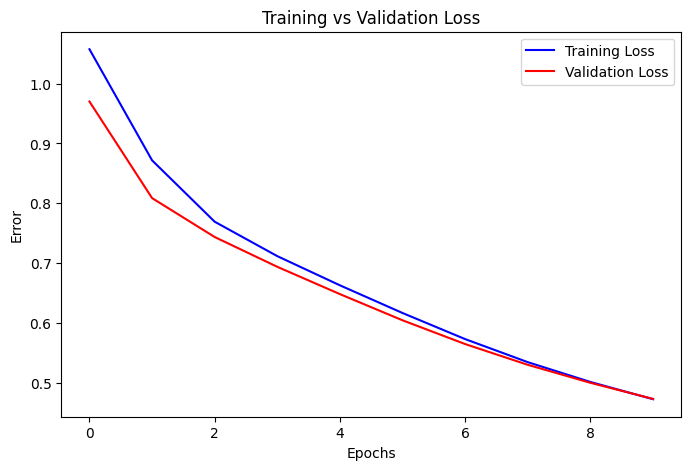

In [75]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_losses)), train_losses, label="Training Loss", color='blue')
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

Looking at the graph of both training and validation losses across epochs, both losses are consistently relatively close together. It should also be noted that as more epochs are run through, both losses decrease consistently and approach convergence (reached a minimum of ~0.47 loss at the 10th epoch). These factors prove that the initial model is generalizing well to our data.

# VII. Error Analysis

In this section, we analyze the performance of all trained models to understand their strengths and weaknesses. We evaluate each model using appropriate metrics such as accuracy, precision, recall, and F1-score to assess how well they classify work status. Additionally, we identify which categories are harder to classify by examining misclassifications using confusion matrix.

## K-Nearest Neighbors

After making predictions on the test set using the KNN model, we evaluated its performance using a classification report, which provides key metrics: precision, recall, and F1-score for each class. The overall accuracy of the model is 96%, indicating that it correctly classified most test samples.

- Underworked: The model performed well, achieving a precision of 95% and a recall of 100%. This means that all actual underworked cases were correctly classified, but some instances from other categories might have been classified as underworked.
- Normal: The model achieved a precision of 96% and recall of 94%, showing that most normal cases were classified correctly, though a small percentage were misclassified.
- Overworked: The model obtained 100% precision but a recall of 91%, meaning that all predicted overworked cases were truly overworked, but 9% of actual overworked individuals were misclassified into other categories.

In [76]:
knn_predictions = knn.predict(X_test_knn)
# Evaluation metrics
print(classification_report(y_test_knn, knn_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6564
           1       0.96      0.94      0.95      4260
           2       1.00      0.91      0.95      3447

    accuracy                           0.96     14271
   macro avg       0.97      0.95      0.96     14271
weighted avg       0.96      0.96      0.96     14271



The confusion matrix provides a detailed breakdown of the KNN model's performance by showing the number of correctly and incorrectly classified instances for each class. Each row represents the true class, while each column represents the predicted class.

1. Underworked:
- 6549 samples were correctly classified as Underworked.
- 12 samples were misclassified as Normal.
- 3 samples were misclassified as Overwork

2. Normal:
- 4007 samples were correctly classified as Normal
- 241 samples were misclassified as Underworked
- 12 samples were misclassified as Overworked

3. Overworked:
- 3149 samples were correctly classified as Overworked
- 137 samples were misclassified as Underworked
- 161 samples were misclassified as Normal

The majority of predictions are correct, confirming that the model has high accuracy.

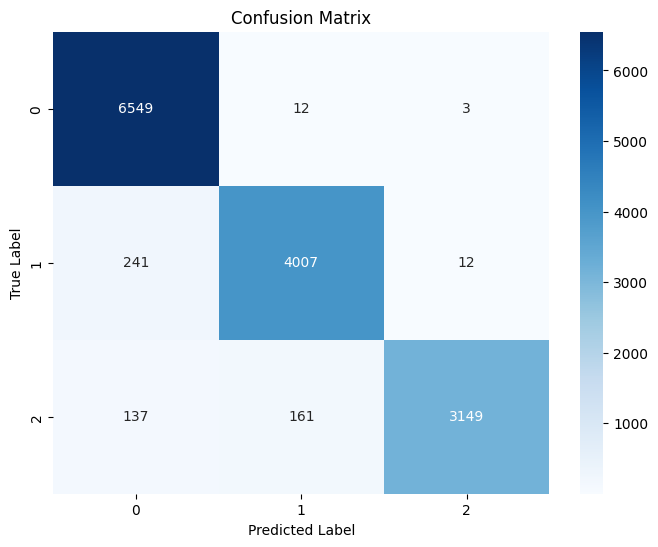

In [77]:
y_pred = knn.predict(X_test_knn)

cm = confusion_matrix(y_test_knn, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Multinomial Logistic Regression

Having proven that no overfitting or underfitting is observed in the model, we further look into other key evaluation metrics to understand how good the multinomial logistic regression model performed. We check this by evaluating how the model performs with new data from the test dataset.

In [78]:
# MLR 
MLR_predictions = MLR_model.predict(mlr_X_test)
# Evaluation metrics
print(classification_report(mlr_y_test, MLR_predictions))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75      6564
           1       0.00      0.00      0.00      4260
           2       0.87      0.89      0.88      3447

    accuracy                           0.67     14271
   macro avg       0.49      0.63      0.54     14271
weighted avg       0.49      0.67      0.56     14271

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [79]:
print(set(mlr_y_test) - set(MLR_predictions))

{1}


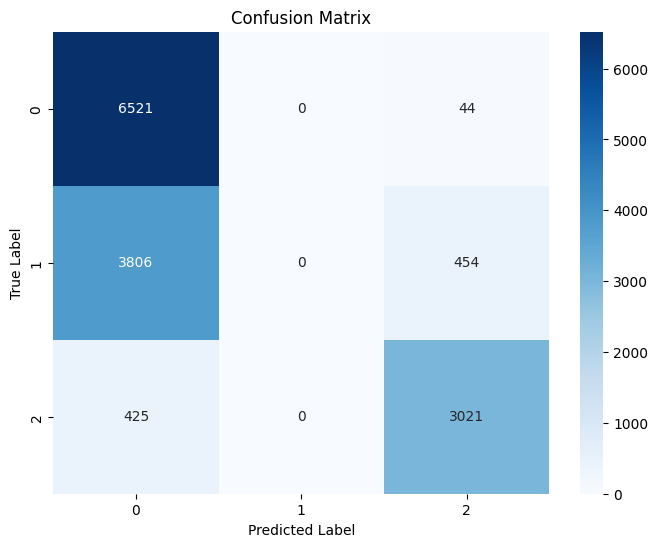

In [80]:
y_pred = MLR_model.predict(mlr_X_val)

cm = confusion_matrix(mlr_y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1. Underworked:
- 6521 samples are correctly classified as Underworked.
- 44 samples are misclassified as Overworked.

2. Normal:
- 0 samples are correctly classified as Normal
- 4260 samples are misclassified:
    - 3806 as Underworked
    - 454 as Overworked

3. Overworked:
- 3021 samples are correctly classified as Overworked
- 425 samples are misclassified as Underworked.

We observed that the model struggled in predicting both Normal and Overworked classes. There are completely no correct classifications of the Normal samples which is indicated by all zeroes across Recall, Precision, and F1-score. Instead, majority of true Normal samples are falsely classified as Underworked. There are also numerous instances of overworked samples which are misclassified as Underworked.

## Neural Network

Having proven that no overfitting or underfitting is observed in the model, we further look into other key evaluation metrics to understand how good the neural network model performed. We check this by evaluating how the model performs with new data from the test dataset.

In [81]:
# Neural Network 
nn_predictions = network.predict(X_nn_test)
print(classification_report(y_nn_test, nn_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6564
           1       0.81      0.94      0.87      4260
           2       1.00      0.70      0.82      3447

    accuracy                           0.91     14271
   macro avg       0.92      0.88      0.89     14271
weighted avg       0.92      0.91      0.90     14271



The neural network model performs well with an overall accuracy of 90%. However, it indicates some inaccuracies occuring within certain classes.

- Underworked Class - This performed best among all classes with 94% precision, 100% recall, and 97% f1-score; indicating that all underworked instances are correctly predicted with very few false positives. 

- Normal Class - A lower performance was observed having had 81% precision, 94% recall, and 87% f1-score. This means that a considerable amount of instances was being falsely predicted as Normal but most normal instances are predicted correctly.

- Overworked Class - This class has the highest precision at 100% but with the lowest recall at 70%, f1-score is 82%. No false positives were observed but it was not able to predict all true overworked instances correctly.

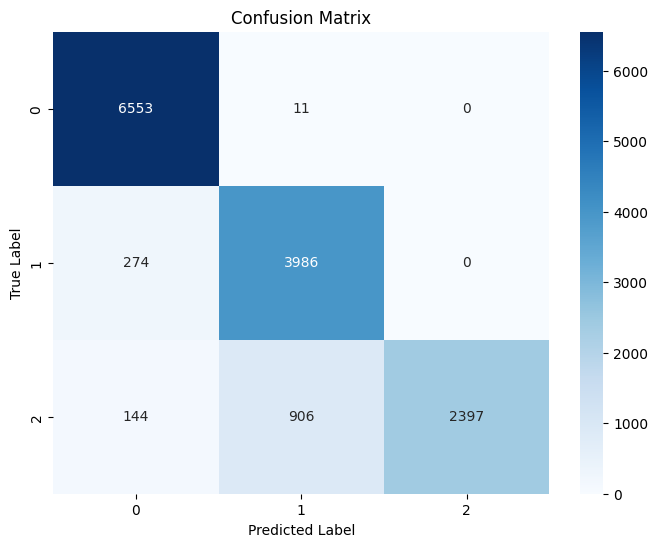

In [82]:
cm = confusion_matrix(y_nn_test, nn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix illustrates the number of correct and false predictions. We observe that the Underworked class performs best with only 11 instances incorrectly predicted. The Normal class can be argued to be the second best performing with only 274 incorrect predictions. Lastly, we find the overworked class to be the class the model struggles to predict the most with a total of 1,050 incorrect predictions. 

# VIII. Improving Model Performance

Perform grid search or random search to tune the hyperparameters of each model. You should also tune each model to reduce the error in difficult classes and/or instances. In this section of the notebook, please take note of the following: 
- Make sure to elaborately explain the method of hyperparameter tuning. 
- Explicitly mention the different hyperparameters and their range of values. Show the corresponding performance of each configuration. 
- Report the performance of all models using appropriate evaluation metrics and visualizations. 
- Properly interpret the result based on relevant evaluation metrics.

## K-Nearest Neighbors

When training a KNN model, choosing the right settings (or hyperparameters) is crucial for achieving good accuracy. These hyperparameters include the number of neighbors to consider (k), how neighbors are weighted, and the method used to measure distances between points. Instead of guessing the best values, we can use GridSearchCV, an automated method that tests different combinations and selects the best one.

Before training the KNN model, the dataset needs to be properly prepared to ensure accurate and efficient learning. First, categorical features, which are originally in boolean format, are converted into integers to make them usable for the model. Then, the input features (X) and target variable (y) are extracted, with the target variable being converted into a categorical type with numerical codes for easy processing. Since numerical features can have different scales, standardization is applied using StandardScaler(), which transforms these features to have a mean of zero and a standard deviation of one. After these preprocessing steps, the dataset is ready for training with the KNN classifier.

In [83]:
numerical_features = ['norm_working_hrs', 'num_hrs_worked']
categorical_features = [
    'business_kind_A', 'business_kind_F', 'business_kind_G',
    'business_kind_O', 'business_kind_P', 
    'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3',
    'prim_occ_class_6', 'prim_occ_payment_basis_3'
]

# Convert categorical (boolean) features into int
knn_df[categorical_features] = knn_df[categorical_features].astype(int)

# Extract input features and target variable
X = knn_df[numerical_features + categorical_features].values
y = knn_df['work_category'].astype('category').cat.codes.values 

# Standardize numerical features 
scaler = StandardScaler()
X[:, :len(numerical_features)] = scaler.fit_transform(X[:, :len(numerical_features)])

knn = KNeighborsClassifier()

This code performs hyperparameter tuning for a K-Nearest Neighbors (KNN) classifier using grid search. The goal is to find the best combination of parameters that improves model accuracy.

n_neighbors: This is the k in KNN, which controls how many nearest neighbors are considered when making a prediction. We test values 3, 5, 7, 9, 11, 15 and 20 to see which works best.

weights: Determines how neighbors contribute to the prediction.
- uniform: All neighbors are equally important.
- distance: Closer neighbors have more influence than farther ones.

metric: Defines how distance is calculated between points.
- euclidean: Straight-line distance between points.
- manhattan: Distance measured by horizontal and vertical movements (like a grid).
- minkowski: A generalization that can behave like both Euclidean and Manhattan distances.

GridSearchCV: This automates the process of testing different hyperparameter combinations and finding the best one.

In [84]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Different k values
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Displays the best combination of k, weighting strategy, and distance metric that resulted in the highest accuracy.
print("Best Parameters:", grid_search.best_params_)

# Retrieves the KNN model with the best parameters.
best_knn = grid_search.best_estimator_

# Uses this optimized KNN model to predict labels for the test data.
y_pred_knn = best_knn.predict(X_test_knn)
 
print(classification_report(y_test_knn, y_pred_knn))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6564
           1       0.97      0.95      0.96      4260
           2       1.00      0.92      0.96      3447

    accuracy                           0.97     14271
   macro avg       0.97      0.96      0.96     14271
weighted avg       0.97      0.97      0.97     14271



The best combination of parameters for the KNN model was found to be using the Manhattan distance metric, 15 neighbors, and distance-based weighting. These settings provided the highest accuracy during cross-validation.

Overall, these results suggest that the model is performing well, with only minor misclassifications, particularly in Class 2. The improvement in accuracy compared to the untuned model (96% to 97%) shows that selecting the right hyperparameters has a positive impact on performance. This suggests that adjusting parameters such as the number of neighbors, distance metric, and weighting strategy can help the KNN model make more accurate predictions.

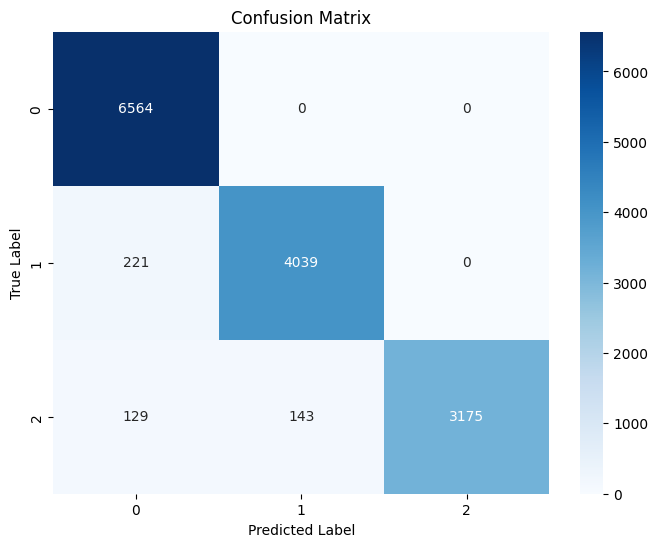

In [85]:
cm = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Prediction Results based on Confusion Matrix:
1. Underworked:
- 6564 samples were correctly classified as Underworked.
- 0 samples were misclassified as Normal.
- 0 samples were misclassified as Overwork

2. Normal:
- 4039  samples were correctly classified as Normal
- 221 samples were misclassified as Underworked
- 0 samples were misclassified as Overworked

3. Overworked:
- 3175 samples were correctly classified as Overworked
- 129 samples were misclassified as Underworked
- 143 samples were misclassified as Normal

We can observed that most of the instances were correctly classified specially the underworked class having no misclassified instances.

The dataframe below details the corresponding performance of each 50 hyperparamter configurations for this model based on mean test scores.


## Multinomial Logistic Regression

#### Random Search

We begin by defining an initial MLR model, using default values for hyperparameters that are not being tuned. To evaluate different model configurations, we apply repeated stratified k-fold cross-validation (10 folds, repeated 3 times). Next, we define the hyperparameter search space for optimization.

- The `penalty` controls the regularization which prevents potential overffiting scenario. Its values are:
  - L2 (ridge regression), L1(lasso regression), and Elasticnet (combination of L1 and L2).
- The `alpha` adjusts the regularization strength where the higher the value, the stronger the regularization. Its logvalues are sampled from a log-uniform distribution between 1e-5 to 1e-1 where higher value increases the regularizatiobn while lower values presents potentiial overfitting.

- The `learning_rate` dictates how the weight updates occurs. The learning rate schedule:

  - `constant`: eta = eta0
  - `optimal`: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
  - `invscaling`: eta = eta0 / pow(t, power_t)
  - `adaptive`: eta = eta0, as long as the training keeps decreasing. 
  
- The `eta0` adjusts the initial learning rate, where lower values ensures stability while higher values allows for faster convergence. Its logvalues are sampled from a log-uniform distribution between 1e-5 to 1e-1 where the smaller value ensure stability but slower convergence while the larger value allows for faster convergence but may overshoot the optimal value.

- The `max_iter` is the maximum number of passes over the training data (aka epochs). Its values are 500, 1000, 2500, or 5000. The higher the number, the more time is alocated for convergence yet unnecessary computation may occur. In constrast, the lower the number, the higher the chance for underfitting. 

Further, the search is defined using `RandomizedSearchCV` method as the procedure with these elements: `num_iter` is set to 500, accuracy for evaluation metric(`scoring`), -1 for `n_jobs`, cross_validation for `cv` that uses the defined 10-fold, 3-repeated cross validation, and 1 for `random_state`. A high values for n_iter is chosen as it leads to a more thorough search space.  -1 is chosen for n_jobs to be able to use all available CPU cores available to speed up the search process. Lastly, a fixed random seed is set to ensure result reproducibility.   

In [86]:
numerical_features = ['norm_working_hrs', 'num_hrs_worked']
categorical_features = [
    'business_kind_A', 'business_kind_F', 'business_kind_G',
    'business_kind_O', 'business_kind_P', 
    'prim_occ_class_1', 'prim_occ_class_2', 'prim_occ_class_3',
    'prim_occ_class_6', 'prim_occ_payment_basis_3'
]

# Convert categorical (boolean) features into int
mlr_df[categorical_features] = mlr_df[categorical_features].astype(int)

# Extract input features and target variable
X = mlr_df[numerical_features + categorical_features].values
y = mlr_df['work_category'].astype('category').cat.codes.values 

# Standardize numerical features 
scaler = StandardScaler()
X[:, :len(numerical_features)] = scaler.fit_transform(X[:, :len(numerical_features)])


In [87]:

#Initialize the model by SGD Classifier wth logistic regression loss
impr_model = SGDClassifier(loss='log_loss', random_state=1)

# Define repeated stratified k-fold cross validation 
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define hyperparameter search space
hyperparams = {
    'penalty': ['l2', 'l1', 'elasticnet'],                     
    'alpha': loguniform(1e-5, 1e-1),                          
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  
    'eta0': loguniform(1e-5, 1e-1),                           
    'max_iter': [500, 1000, 2500, 5000]
}

# Perform hyperparameter search
random_search = RandomizedSearchCV(impr_model, hyperparams, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cross_validation, random_state=1, verbose=1)

# Fitting the model using training data with hyperparamter search
random_search.fit(mlr_X_train, mlr_y_train)


# Retrieve the best hyperparameter config 
best_params = random_search.best_params_
print(best_params)


Fitting 30 folds for each of 50 candidates, totalling 1500 fits
{'alpha': 0.03255142562491928, 'eta0': 2.4739295913040163e-05, 'learning_rate': 'adaptive', 'max_iter': 2500, 'penalty': 'l1'}


In [88]:
 display(best_params)

{'alpha': 0.03255142562491928,
 'eta0': 2.4739295913040163e-05,
 'learning_rate': 'adaptive',
 'max_iter': 2500,
 'penalty': 'l1'}

Then, we retrain the model with the chosen hyperparameters from `best_params` to get the tuned model, and evaluate its performance.

In [89]:
# Initialize the tuned model using the same SGD Classifier using the chosen hyperparameters
tuned_MLR_model = SGDClassifier(**best_params, loss='log_loss', random_state=1)
# Train and fitting the model using the training data
tuned_MLR_model.fit(mlr_X_train, mlr_y_train)
# Make predictions using the test data
y_prediction = tuned_MLR_model.predict(mlr_X_test)

print(classification_report(mlr_y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6564
           1       0.93      0.75      0.83      4260
           2       0.89      0.89      0.89      3447

    accuracy                           0.90     14271
   macro avg       0.90      0.88      0.89     14271
weighted avg       0.90      0.90      0.89     14271



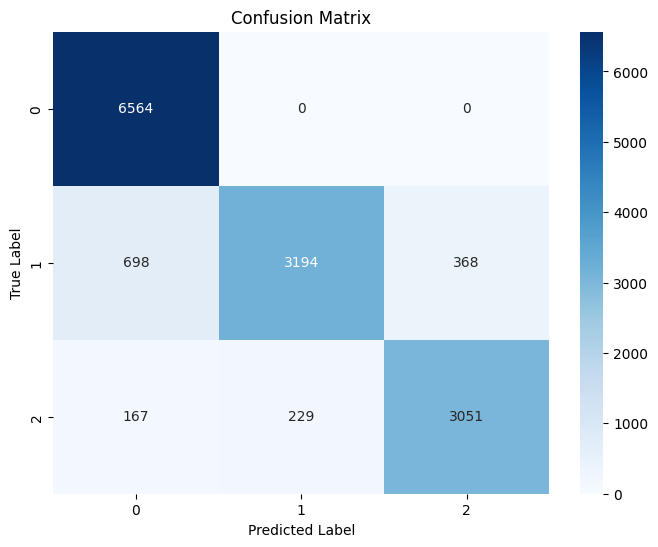

In [90]:
# Display confusion matrix
cm_mlr = confusion_matrix(mlr_y_test, y_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Prediction Results based on Confusion Matrix:
1. Underworked:
- 6564 samples were correctly classified as Underworked.
- 0 samples were misclassified as Normal.
- 0 samples were misclassified as Overwork

2. Normal:
- 3194 samples were correctly classified as Normal
- 698 samples were misclassified as Underworked
- 368 samples were misclassified as Overworked

3. Overworked:
- 3051 samples were correctly classified as Overworked
- 167 samples were misclassified as Underworked
- 229 samples were misclassified as Normal

We can observed that most of the instances were correctly classified specially the underworked class having no misclassified instances.

The dataframe below details the corresponding performance of each 50 hyperparamter configurations for this model based on mean test scores.


,mean_test_score,param_alpha,param_eta0,param_learning_rate,param_max_iter,param_penalty
8,0.896511,0.032551,0.000025,adaptive,2500,l1
5,0.890462,0.000036,0.000062,optimal,1000,l1
13,0.887526,0.000142,0.000033,optimal,1000,elasticnet
4,0.886250,0.001373,0.045274,adaptive,1000,l1
33,0.886211,0.000013,0.000013,optimal,5000,l1
32,0.886133,0.000016,0.00119,optimal,1000,l2
40,0.886055,0.00008,0.007111,optimal,500,l2
29,0.885121,0.000012,0.052209,optimal,1000,l2
17,0.885004,0.000016,0.001392,constant,1000,elasticnet
16,0.884529,0.000026,0.000453,optimal,1000,l2


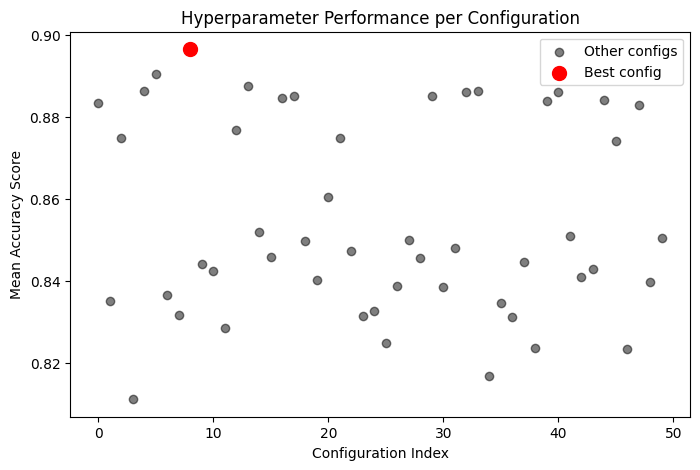

In [91]:
# Converting result to dataframe
rs_results_df = pd.DataFrame(random_search.cv_results_)
# Extract relevant hyperparam config and sort by mean test score
configurations = rs_results_df[[ 'mean_test_score', 'param_alpha', 'param_eta0', 'param_learning_rate', 'param_max_iter', 'param_penalty']].sort_values(by='mean_test_score', ascending=False)
display(configurations)
# Identifies the best hyperparameter config
best_idx = configurations['mean_test_score'].idxmax()

# Visualization using scatterplot
plt.figure(figsize=(8,5))
plt.scatter(configurations.index, configurations['mean_test_score'], color='black', marker='o', alpha=0.5, label="Other configs")
plt.scatter(best_idx, configurations.loc[best_idx, 'mean_test_score'], color='red', marker='o', s=100, label="Best config")

plt.xlabel('Configuration Index')
plt.ylabel('Mean Accuracy Score')
plt.title('Hyperparameter Performance per Configuration')
plt.legend()
plt.show()


## Neural Network

A Random Search will be used to optimize the existing Neural Network model. As the name suggests, Random Search randomly picks parameter values from a given list or range of possible values for each hyperparameter. This differs from Grid Search's systematic approach where it performs an exhaustive search through the hyperparameter space. Because of the randomness, it can cover a broader range of values and may converge to better results faster than grid search.

For this specific example, we will be optimizing the following set of hyperparameters:

- The `hidden_layers` is a list of n elements each indicating the size of a hidden layer where n is the number of hidden layers in the network. Jeff Heaton's advice from his book Introduction to Neural Networks for Java (second edition) mentions a rule of thumb method for choosing the number of neurons in hidden layers:
  - "The number of hidden neurons should be between the size of the input layer and the size of the output layer."
  Following this, we generate a list of 20 randomly generated lists of size 2 with each containing a tuple of two integers between 4 (output size + 1) and 12 (input size - 1).

- The `lr` stands for the learning rate; this controls how fast the Neural Network would approach or converge to a minima. We experiment using 4 values: 0.0001, 0.001, 0.01 and 0.1. This allows us to search from a broader set of values to find the optimal learning rate.

- The `batch_size` indicates the number of samples to use in each batch of the 'mini-batches' during training. We look into searching from 32 to 256 as it provides a good balance between convergence and stability.

- The `max_epochs` is the maximum epochs or iterations that the Neural Network will be trained for. We try out three values varying from small (50), moderate (100) and large (150) to understand which works best for the model.

In [92]:
# set random seed for reproducibiliity of results
random.seed(15)

param_dist = {
	# a list indicating sizes for two layers from 4 to 12
    'module__hidden_layers': [
        (random.randint(4, 12), random.randint(4, 12)) 
        for _ in range(20) 
    ],
    'lr': [0.0001, 0.001, 0.01, 0.1], 
    'batch_size': [32, 64, 128, 256],
    'max_epochs': [50, 100, 150]
}

To start off the hyperparameter tuning, we first create the initial network to be tuned. The parameters used is the same with that of the initial model created in Section VI of this notebook.

In [93]:
initial_network = NeuralNetClassifier(
    module=NeuralNetwork,
    module__in_features=X_nn_train.shape[1],
    module__hidden_layers=(11, 6),
    module__out_features=3,
    module__activation="relu",

    lr=0.0001,
    max_epochs=10,
    batch_size=64,
    criterion=nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,

    iterator_train__shuffle=True,
    callbacks = [EarlyStopping(patience=5), 
                 LRScheduler(policy=StepLR, step_size=10, gamma=0.1)],

    verbose=0
)

initial_network.initialize()
# print(network)

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=NeuralNetwork(
    (layers): Sequential(
      (0): Linear(in_features=12, out_features=11, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=11, out_features=6, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=6, out_features=3, bias=True)
      (5): Softmax(dim=1)
    )
  ),
)

We then instantiate a RandomizedSearchCV object for our Random Search. The estimator (object to be instantiated for each grid point) is set to our initial network with the parameter distributions as param_dist. The number of parameter settings to be sampled is set to 10. A StratifiedKFold is also employed with the number of folds set to 3. Lastly, we set the evaluation strategy to optimize in terms of accuracy.

In [94]:
random_search_nn = RandomizedSearchCV(
    estimator = initial_network,
    param_distributions = param_dist,
    n_iter = 10,
    cv=3,
    scoring = 'accuracy',
    random_state = 15,
    n_jobs = -1, 
    verbose=1
)

random_search_nn.fit(X_nn_train, y_nn_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=NeuralNetClassifier(_params_to_validate={'module__activation', 'module__out_features', 'module__hidden_layers', 'iterator_train__shuffle', 'module__in_features'}, batch_size=64, callbacks=[<skorch.callbacks.training.EarlyStopping object at 0x7fad307da410>, <skorch.callbacks.lr_scheduler.LRScheduler object at 0x7fad307da440>], co...', verbose=0, warm_start=False),
                   n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128, 256],
                                        'lr': [0.0001, 0.001, 0.01, 0.1],
                                        'max_epochs': [50, 100, 150],
                                        'module__hidden_layers': [(7, 4),
                                                                  (12, 4),
                                                                  (6, 7),
                                                                  (4, 4),
                                                                  (6, 9),
                                                                  (7, 5),
                                                                  (9, 11),
                                                                  (9, 8),
                                                                  (10, 8),
                                                                  (9, 7),
                                                                  (7, 9),
                                                                  (9, 7),
                                                                  (8, 12),
                                                                  (10, 7),
                                                                  (11, 10),
                                                                  (11, 5),
                                                                  (11, 9),
                                                                  (11, 9),
                                                                  (11, 10),
                                                                  (5, 11)]},
                   random_state=15, scoring='accuracy', verbose=1)

After the random search, we print out the resulting best parameters that provided the best accuracy for the model. 

In [95]:
print("Best parameters: ", random_search_nn.best_params_)

Best parameters:  {'module__hidden_layers': (9, 11), 'max_epochs': 100, 'lr': 0.01, 'batch_size': 256}


To understand performance across all tested configurations, we print out their accuracy results along with their corresponding hyperparameter configurations.

,mean_test_score,param_module__hidden_layers,param_max_epochs,param_lr,param_batch_size
7,0.964123,"(9, 11)",100,0.01,256
9,0.964106,"(11, 9)",50,0.001,32
2,0.963930,"(9, 7)",100,0.001,32
5,0.961986,"(8, 12)",100,0.1,256
8,0.960742,"(7, 5)",100,0.01,32
6,0.953279,"(4, 4)",150,0.001,64
4,0.950004,"(6, 9)",100,0.001,256
0,0.926985,"(6, 7)",150,0.0001,32
3,0.855476,"(9, 11)",50,0.0001,128
1,0.788049,"(12, 4)",50,0.0001,128


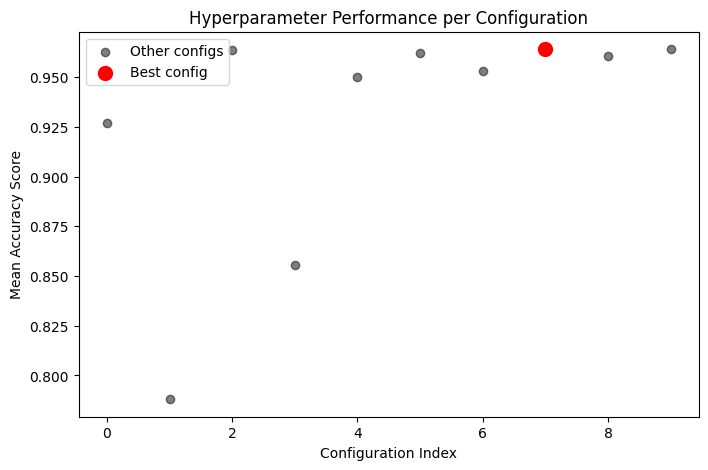

In [96]:
# Visualize all ten configurations
rs_nn_results_df = pd.DataFrame(random_search_nn.cv_results_)
nn_configs = rs_nn_results_df[[ 'mean_test_score', 'param_module__hidden_layers', 'param_max_epochs', 'param_lr', 'param_batch_size']].sort_values(by='mean_test_score', ascending=False)
display(nn_configs)
# Show best configuration
best_idx = nn_configs['mean_test_score'].idxmax()

# Visualization using scatterplot
plt.figure(figsize=(8,5))
plt.scatter(nn_configs.index, nn_configs['mean_test_score'], color='black', marker='o', alpha=0.5, label="Other configs")
plt.scatter(best_idx, nn_configs.loc[best_idx, 'mean_test_score'], color='red', marker='o', s=100, label="Best config")

plt.xlabel('Configuration Index')
plt.ylabel('Mean Accuracy Score')
plt.title('Hyperparameter Performance per Configuration')
plt.legend()
plt.show()

We can then retrieve the best model found within the search by using the best_estimator_ method provided in the RandomizedSearchCV function. Further, we evaluate its performance on new data by predicting the test set and printing out the classification report.

In [97]:
# Get improved neural network
impr_network = random_search_nn.best_estimator_

# test on new data and get evaluation metrics
nn_predictions = impr_network.predict(X_nn_test)
print(classification_report(y_nn_test, nn_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6564
           1       0.96      0.95      0.96      4260
           2       1.00      0.91      0.95      3447

    accuracy                           0.96     14271
   macro avg       0.97      0.95      0.96     14271
weighted avg       0.96      0.96      0.96     14271



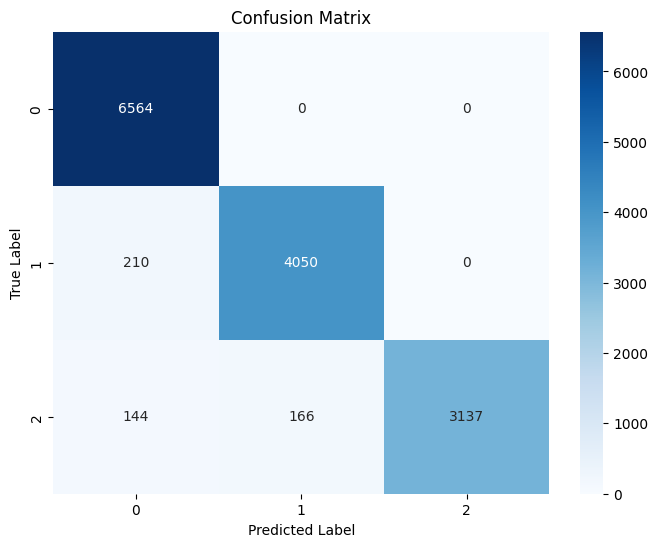

In [98]:
cm = confusion_matrix(y_nn_test, nn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The improved Neural Network model performed better than the initial model with the accuracy from 91% going up to 96%. Although some inaccuracies in prediction remain, it has decreased after tuning the hyperparameters.

- **Underworked Class**: A slight improvement in precision is observed (+1%) which led to all instances being correctly classified.
- **Normal Class**: Performance in predicting the normal class bumped up significantly specifically in precision (+15%); this lowered the amount of instances being falsely classified to 210 (-64 from previous model)
- **Overworked Class**: Recall of this class improved the most upon tuning from the previous 70% to 91%. Precision was retained at 100% and the f1-score increased to 95%. Due to this, the model minimized the number of instances falsely predicted as Normal from 906 down to 166, however, the amount of false predictions of the Underworked class remained the same.

<hr>

#  IX. Model Performance Summary

-Present a summary of all model configurations. In this section of the notebook, do the
following: 
    - Discuss each algorithm and the best set of values for its hyperparameters. Identify the  best model configuration and discuss its advantage over other configurations. 
    - Discuss how tuning each model helped in reducing its error in difficult classes and/or instances. 

<hr>

## K-Nearest Neighbors
The K-Nearest Neighbors (KNN) algorithm was evaluated using different configurations to determine the best-performing model. Hyperparameter tuning was performed using GridSearchCV, which tested multiple values for key parameters:

- Number of neighbors (k): [3, 5, 7, 9, 11, 15, 20]
- Weighting strategy: ['uniform', 'distance']
- Distance metric: ['euclidean', 'manhattan', 'minkowski']

After testing 30 different combinations, the best set of hyperparameters was:
Number of neighbors: 15
Weighting strategy: distance-based
Distance metric: Manhattan

These settings provided the highest accuracy of 97%, improving from the initial 96% before tuning.

### Advantages
The selected configuration performed better than other settings because:

- Higher k-value (15 neighbors): This helps smooth out predictions by considering more data points, reducing sensitivity to noise.
- Distance-based weighting: Instead of treating all neighbors equally, this method gives more importance to closer points, leading to more precise classifications.
- Manhattan distance: This metric performed better than Euclidean distance, likely because it better captures differences in feature values in this dataset.

### Effect of hyperparameter tuning
These adjustments resulted in an increase in overall accuracy from 96% to 97%, demonstrating that fine-tuning hyperparameters helped improve model performance. The most notable improvement was seen in Class 2, where recall increased from 91% to 92%, meaning fewer misclassified instances. This suggests that the model became better at correctly identifying cases that previously caused confusion.

## Multinomial Logistic Regression

The model was trained using 1500 fits across 30 folds, evaluating 50 hyperparameter candidates, leading to the optimal parameters:

 - Alpha = 0.03255 
 - Eta0 = 2.47e-05 
 - Learning Rate = adaptive 
 - Max Iterations = 2500
 - Penalty = L1 

This hyperparameter configuration resulted in an improved predictive performance of the MLR model by balancing regularization strength, learning rate, and model complexity by the use of L1 penalty which helped in selecting the most relevant features, making the model more accurate.

### Advantages
- L1 regularization: Helps in feature selection by removing irrelevant features.
- Adaptive learning rate: Dynamically adjusts during training which ensures stable convergence and preventing overshooting.
- Higher max iterations: Allows the model to learn patterns more effectively compared to lower values
- Balanced regularization (alpha = 0.03255): Prevents overfitting while maintaining flexibility in learning.
- Improved predictions for the Normal class: From all evaluation metrics being zero before tuning, the Normal class' recall increased to 75% and precision went up to 93% after tuning; this addresses the weakness in the initial MLR model.

### Effect of hyperparameter tuning
Before tuning, the model had an overall accuracy of 67% however it struggled with the Normal class with all predictions entirely missing the class. After tuning, recall has improved to 75%, precision has increased to 93% and F1-score has improved to 83%. This shows significant progress in the model's performance when tuned properly with appropriate hyperparameters. The Overworked class performed better with an F1-score of 89%, yet there was still room for improvement. After the hyperparameter tuning, the MLR model's accuracy improved to 90%. The improvements in the model's performance after tuning resulted in a more balanced and accurate classifification across all categories.


## Neural Network

Performance of the Neural Network was improved using Random Search as the method for tuning the hyperparameters, namely: hidden layer sizes, batch size, max epochs, and learning rate. Cross-validation of 3-folds was used for the ten configurations of the model from the Random Search. 

The following parameter distribution was used as the search space for the Random Search:
- `hidden_layers`: list of 20 randomly generated (x, y) tuples where x and y are random integers between 4 and 12.
- `max_epochs`: [50, 100, 150]
- `lr`: [0.0001, 0.001, 0.01, 0.1]
- `batch_size`: [32, 64, 128, 256]

After tuning, the best parameters were:
- `hidden_layers`: (9, 11)
- `max_epochs`: 100
- `lr`: 0.01
- `batch_size`: 256

The improved Neural Network improved accuracy from 91 to 96% with a significant improvement in predicting Normal and Overworked classes. 

### Advantages
- Optimized network architecture: After exploring several variations of hidden layer sizes, this configuration found the best balance and accuracy. The network provides sufficient complexity to capture patterns in the data without becoming too computationally expensive or prone to overfitting.
- Moderate training duration: Instead of the previous model's 10 epochs limit, training for 100 epochs provided additional flexibility for convergence and training time allowing the model to learn and capture patterns more.
- Higher learning rate: Allows the model to converge faster and take less time to train
- Higher batch size: The increase in batch size provides a more stable gradient estimate

### Effect of hyperparameter tuning
It is found in the Error Analysis section that the initial Neural Network model struggled to predict Normal and more especially, Overworked classes. After going through the tuning, all classes show improvements in accuracy. All instances under the Underworked class are now correctly predicted following its 1% increase in precision. Likewise, the Normal class' precision also increased by 15% which lowered the false classifications by 23.3% (from 274 down to 210). Lastly, the Overworked class has shown great performance improvements considering it was the hardest to predict initially. A 20% increase in precision allowed the model to reduce of false predictions of the Normal class by 81.7% (from 906 down to 166).


# X. Insights and Conclusion

This section presents an analysis of the models trained on the dataset, highlighting their performance, strengths, and limitations. By examining the accuracy, precision, recall, and f1-scores of K-Nearest Neighbors (KNN), Multinomial Logistic Regression (MultiLogReg), and Neural Network (NN), we aim to understand why certain models performed better than others. Additionally, we discuss key insights gained from the results and provide recommendations to further improve model performance.

-------------------------------------------------------------------------------------

Out of the three models, K-Nearest Neighbors (KNN) achieved the highest accuracy (97%), followed closely by the Neural Network (96%). Multinomial Logistic Regression had the lowest accuracy (90%), showing over a 6-7% difference compared to the other models. 

`KNN` performed exceptionally well even before applying techniques like Randomized Search or Cross-Validation, likely because it is a simple, memory-based model that effectively memorized the dataset. Since KNN’s accuracy depends heavily on the number of neighbors (k), selecting the optimal value is crucial for achieving the best results. Through hyperparameter tuning, specifically Randomized Search, we identified k = 15 as the best value, which improved the model’s performance by 1%.

For the `Neural Network`, its ability to capture complex patterns in the data contributed to its high accuracy. Initially, it performed slightly worse, but after hyperparameter tuning using Randomized Search, its accuracy significantly improved.

On the other hand, `MultiLogReg` started with the worst accuracy at around 67%. However, after tuning its parameter with over 50 different configurations, its accuracy improved to 90%. Despite this, it still performed worse than KNN and the Neural Network. 

It can also be noted that all models struggled to predict instances of both Overworked and Normal classes. This could be due to the imbalanced classes in the dataset where the majority of instances belong to the Underworked class. Although stratified splits helped in reducing biases to some degree, improvements on the distribution of the dataset could help in improving performance across models.

Recommendations for Improvement:
To improve the models, we can do the following:
- For `KNN`: Further tuning of k (number of neighbors) could help improve accuracy. Testing more values, especially larger ones, might stabilize performance.
- For `Mutlinomial Logistic Regression`: Since this model had the lowest accuracy, adding more relevant features or using polynomial features could enhance its ability to capture patterns in the data.
- For `Neural Network`: More experimentation with hyperparameters such as the number of layers, neurons, activation functions, learning rate and its schedulers could improve results.

Overall, KNN gave the best results, but Neural Networks are also a good option, especially for handling complex data.

# XI. References

sklearn.linear_model.SGDClassifier — scikit-learn 0.22.2 documentation. (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

GeeksforGeeks. (2025, January 29). KNeArest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/

Ibm. (2025, February 12). What is the K-nearest neighbors algorithm?. IBM. https://www.ibm.com/think/topics/knn

Arunimsamudra. (2020, April 25). k-NN with Hyperparameter Tuning. Kaggle. https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning

Abba, I. (2023, January 25). KNN Algorithm – K-Nearest Neighbors classifiers and model example. freeCodeCamp.org. https://www.freecodecamp.org/news/k-nearest-neighbors-algorithm-classifiers-and-model-example/?utm_source=chatgpt.com

GeeksforGeeks. (2025, February 4). How to find the optimal value of K in KNN. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-find-the-optimal-value-of-k-in-knn/?utm_source=chatgpt.com

FAQ — skorch 1.1.0 documentation. (n.d.). https://skorch.readthedocs.io/en/stable/user/FAQ.html 

GeeksforGeeks. (2024, October 14). How to calculate optimal batch size for training neural networks. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-calculate-optimal-batch-size-for-training-neural-networks/ 

Heaton, J. (2008). Introduction to Neural Networks with Java. Heaton Research, Inc. 

History — skorch 1.1.0 documentation. (n.d.). https://skorch.readthedocs.io/en/stable/user/history.html 

Kopal. (2024, April 19). Train PyTorch Models Scikit-learn Style with Skorch. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2024/04/train-pytorch-models-scikit-learn-style-with-skorch/ 

NeuralNet — skorch 1.1.0 documentation. (n.d.). https://skorch.readthedocs.io/en/stable/user/neuralnet.html 

skorch.callbacks — skorch 1.1.0 documentation. (n.d.). https://skorch.readthedocs.io/en/stable/callbacks.html 

skorch.classifier — skorch 1.1.0 documentation. (n.d.-a). https://skorch.readthedocs.io/en/stable/classifier.html 

skorch.classifier — skorch 1.1.0 documentation. (n.d.-b). https://skorch.readthedocs.io/en/stable/classifier.html#skorch.classifier.NeuralNetClassifier 

Skorch-Dev. (n.d.). skorch/skorch/net.py at master · skorch-dev/skorch. GitHub. https://github.com/skorch-dev/skorch/blob/master/skorch/net.py 

Varma, P. (2024, December 30). A Beginners guide to Skorch – with code to implement neural network. 

Analytics India Magazine. https://analyticsindiamag.com/deep-tech/a-beginners-guide-to-skorch-with-code-to-implement-neural-network/ 

What are Fine-tuning Hyperparameters and How to Set Them | Entry Point AI. (n.d.). https://www.entrypointai.com/blog/fine-tuning-hyperparameters/

DOLE ADVISORY NO. 02, S. 2004 - IMPLEMENTATION OF COMPRESSED WORKWEEK SCHEMES - Supreme Court E-Library. (n.d.). https://elibrary.judiciary.gov.ph/thebookshelf/showdocs/10/40740

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=36d9e91e-00b6-4ac4-a9c1-ca130aef98d8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>